In [70]:
pip install wordcloud

In [71]:
import os 
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from keras import preprocessing,layers,models
from wordcloud import WordCloud
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [72]:
data = pd.read_csv('Downloads/Twitter Sentiment Analysis/twitter_training.csv',header = None,names = ['id','entity','sentiment','text'])
valdata = pd.read_csv('Downloads/Twitter Sentiment Analysis/twitter_validation.csv',header = None,names = ['id','entity','sentiment','text'])
data.head()

id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...

In [73]:
np.unique(data['sentiment'])

array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object)

In [74]:
#result = ['Positive','Negative']
##data=data[data['sentiment'].isin(result)]
#valdata=valdata[valdata['sentiment'].isin(result)]

In [75]:
data=data.reset_index(drop=True)
valdata=valdata.reset_index(drop=True)

In [76]:
data['lower case'] = data.text.str.lower()
data['sentiment'] = data.sentiment.str.lower()
data['lower case']= [str(data1) for data1 in data['lower case']]
data['lower case'] = data['lower case'].apply(lambda x: re.sub("[^A-Za-z0-9' ]+", ' ', x))

valdata['lower case'] = valdata.text.str.lower()
valdata['sentiment'] = valdata.sentiment.str.lower()
valdata['lower case']= [str(valdata1) for valdata1 in valdata['lower case']]
valdata['lower case'] = valdata['lower case'].apply(lambda x: re.sub("[^A-Za-z0-9' ]+", ' ', x))

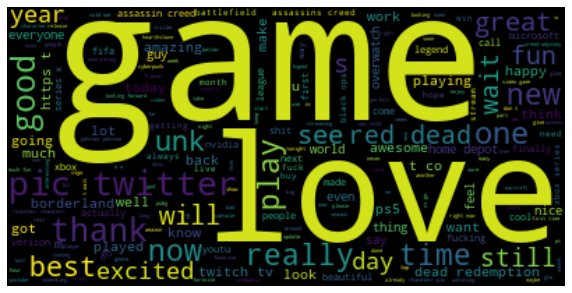

In [77]:
positive_words = data[data['sentiment'] == "positive"]
word_cloud_text = ' '.join(positive_words['lower case'])
#Creation of wordcloud
wordcloud = WordCloud(
    
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

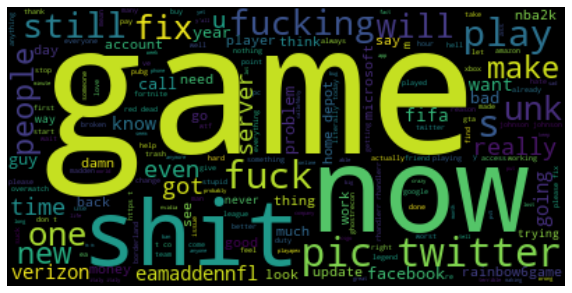

In [78]:
positive_words = data[data['sentiment'] == "negative"]
word_cloud_text = ' '.join(positive_words['lower case'])
#Creation of wordcloud
wordcloud = WordCloud(
    
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

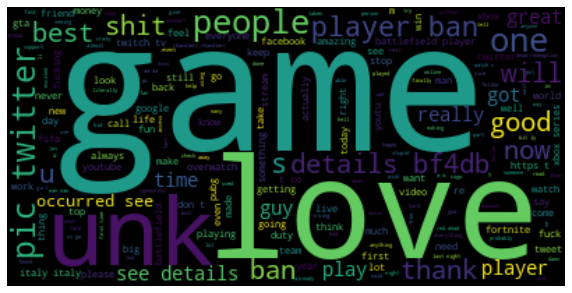

In [79]:

positive_words = data[data['sentiment'] == "irrelevant"]
word_cloud_text = ' '.join(positive_words['lower case'])
#Creation of wordcloud
wordcloud = WordCloud(
    
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

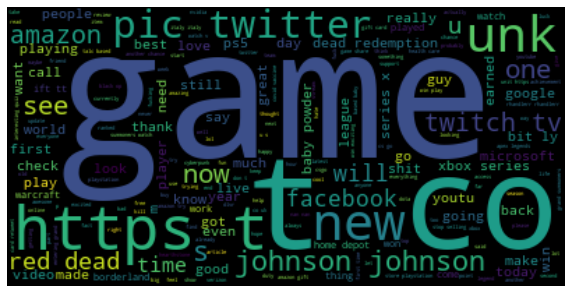

In [80]:

positive_words = data[data['sentiment'] == "neutral"]
word_cloud_text = ' '.join(positive_words['lower case'])
#Creation of wordcloud
wordcloud = WordCloud(
    
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [81]:
from keras.utils.np_utils import to_categorical   

In [82]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
a = OrdinalEncoder()
testing = np.array(data['sentiment'])
valtesting = np.array(valdata['sentiment'])

In [83]:
newtest=[]
for i in testing:
    newtest.append(str(i))


valtest=[]
for i in valtesting:
    valtest.append(str(i))


In [84]:
test = a.fit_transform(np.array(newtest).reshape(-1, 1)).ravel()

test = np.eye(np.unique(test).shape[0])[np.array(test, dtype=np.int32)]

valtest = a.transform(np.array(valtest).reshape(-1,1)).ravel()
valtest = np.eye(np.unique(valtest).shape[0])[np.array(valtest, dtype=np.int32)]

In [85]:
a.categories_

[array(['irrelevant', 'negative', 'neutral', 'positive'], dtype='<U10')]

In [86]:
test[0]

array([0., 0., 0., 1.])

In [87]:
a=[]
for i in data['lower case']:
    print(i)
    a.append(one_hot(i,3000))
    
vala=[]
for i in valdata['lower case']:
    print(i)
    vala.append(one_hot(i,3000))

im getting on borderlands and i will murder you all  
i am coming to the borders and i will kill you all 
im getting on borderlands and i will kill you all 
im coming on borderlands and i will murder you all 
im getting on borderlands 2 and i will murder you me all 
im getting into borderlands and i can murder you all 
so i spent a few hours making something for fun      if you don't know i am a huge  borderlands fan and maya is one of my favorite characters  so i decided to make myself a wallpaper for my pc    here is the original image versus the creation i made   enjoy  pic twitter com mlsi5wf9jg
so i spent a couple of hours doing something for fun  if you don't know that i'm a huge   borderlands fan and maya is one of my favorite characters  i decided to make a wallpaper for my pc  here's the original picture compared to the creation i made  have fun  pic twitter com   mlsi5wf9jg
so i spent a few hours doing something for fun  if you don't know i'm a huge   borderlands fan and maya

 borderlands  duvalmagic  the hearts event is brilliant   thank you 
  borderlands   duvalmagic the hearts event is brilliant  thank you 
  borderlands   duvalmagic the hearts event is brilliant  thank you 
 borderlands  duvalmagic  every hearts event is brilliant   thank you 
so  borderlands the  duvalmagic the hearts of event which is brilliant  thank you 
 borderlands  duvalmagic the hearts event was truly thank you 
first legendary drop  think i'm going to have a good time with  borderlands      lordsgamingnet  
the first legendary drop  think i'm going to have a good time with   borderlands    lordsgamingnet
first legendary drop  think i'm going to have a good time with   borderlands    lordsgamingnet
first legendary drop  think i'm going to have a little time with  borderlands     lordsgamingnet
first legendary plane drop  think i'm going over to get have a pretty good time with  borderlands  as  lordsgamingnet
first legendary drop  and i'm going to have a wonderful time with thi

 duvalmagic why tf can i only free john but not release him  plz someone at  gearboxofficial to give me plz help  sam can t figure everything out and it s driving people sick
man when borderlands 3 came out i though  eh its nowhere near as good as borderlands 2  and the music isn't nearly as good  i was a naive fool i love this game so much
man when borderlands 3 came out i though  eh it never nearly as good as borderlands 2  and the music is not nearly as good  i was a naive fool  i love this game so much 
man when borderlands 3 came out i though  eh its nowhere near as good as borderlands 2  and the music is not nearly as good  i was a naive fool i love this game so much
man when borderlands 3 came out i though  eh thats nowhere near as great as borderlands 2  and the music isn't nearly as good  i was a naive fool i hate this game so much
man when borderlands 3 came out i though   eh its in nowhere close near as  good as borderlands 2  and the music isn't really nearly as good   i wa

tbh miss it
tbh miss reading
even tbh miss it
tbh miss find
crazy   
crazy 
mistakes 
crazy break
come crazy 
crazy 
bruuuhhh wtf is wrong with these gay ass pc players
bruuuhhh wtf is wrong with these gay ass pc players
bruuuhhh wtf is wrong with these gay ass pc players
bruuuhhh wtf is wrong with these gay unk  pc players
bruuuhhh oh wtf is wrong with me these good gay ass pc players
bruuuhhh wtf is working with these gay music pc players
my temporary gaming setup until the game room is built  who excited for the new  callofduty coldwar   
my temporary game setup until the construction of the game room  who was looking forward to the new   callofduty coldwar 
my temporary game settings until the game room is built 
my standard gaming setup until the game room is built  who excited for the new  callofduty interface 
my temporary gaming setup until only the game room is built  who more excited for having the fancy new  callofduty coldwar 
my temporary gaming setup until every game real

so cod black ops cold war unk  gonna be ass   realthunder402 where were we dropping at 
so cod   and black circle ops thinks cold war is gonna be ass   realthunder402 to where are we dropping at 
so cod black american global war is gonna our ass   realthunder402 where are we dropping at 
new cod 
new cod 
new cod 
new cod 
some new cod   unk 
al cod unk 
no more call of duty games society has progressed past the need of call of duty games
no longer a compulsory gaming society has gone beyond the necessity of compulsory gaming
society no longer needs on call games
no other call of duty games society has progressed past the need of call of duty games
no more a call card of duty games society has progressed past the need of call of dead duty games
no more call of bush games society has progressed past the need of call of reserve games
why are people upset with this  it s just an accessibility thing  if it doesn t apply to you then leave it alone  it s not forcing you 
why do people get up

people will wank it to anything huh
people are going to wank it to something  aren't they 
people will want it to anything huh
people will apply it to anything huh
people will never wank it to anything huh
people will wank it to me huh
 lautaro61619477 thanks for entering grand summoners      watch the video to see if you won a  100 amazon gift card    retweet every day for another chance to win      play gs global now for a free   5 one punch man unit   https t co d3g70pptjf
  lauraro61619477 thank you for participating in summoners  watch the video to see if you have won an amazon gift card worth  100  retweet every day for another chance to win  play gs global now free  5 one punch man unit  https      t co   d3g70pptjf
  61619477 thank you for joining grand summoners  watch the video to see if you won an amazon gift card worth  100  retweet every day for another chance to win  play gs global now for free  5 one punch man unit 
 lautaro61619477 thanks for entering grand summoners   

plague without corruption is
plague of public corruption is
age of corruption is
a jaded priest's quest for the truth takes a lethal turn when he stumbles upon an ancient conspiracy  thrusting him into the clutches of a fanatical enemy in the vatican    the package      a conspiracy worth killing for       and dying for    amazon  amazon com dp b07nv4zvbq
an exhausted priest's quest for the truth takes a deadly turn when he comes across an ancient conspiracy that pushes him into the clutches of a fanatical enemy in the vatican  the package  a conspiracy worth killing for  and worth dying for  amazon  amazon com   dp   b07nv4zvbq
the search for truth by a demented priest takes a deadly turn when he stumbles upon an ancient plot  pushing him into the arms of a fanatical enemy in the vatican  package  a plot worth killing for  and dying for  amazon  amazon com   dp   bnv4zvbq
a jaded priest's quest for the truth takes a lethal turn when revelation unk  upon an ancient conspiracy  thrustin

when abby  a pre treated major  moved into the dorms  she had no idea she was going to meet a black cop  let alone fall in love with one  the pre med   the bull  interracial cuckolding  1 of 3  by   authordavidbird  amazon  amzn to   36ukw7f https      t co   lcoroatxnr
the pre med   the bull  interracial cuckolding  1 of 3  by   authordavidbird  amzingto   36ukw7f https      frecco   lcoroatxnr
when abby  a pre med major stumbled into the dorms was had no idea that a would meet a beautiful bull  let alone to fall in love in one  the pre med   the bull  interracial cuckolding book of 3  by   authordavidbird  amazon   amzn to 36ukw7f https t co lcoroatxnr 
when abby  a pre   med major moved into the dorms she had exactly no idea that ever she would meet a crazy black bull  let alone to fall utterly in instant love with any one  the pre   med   the bull   a interracial cuckolding   revised 1 edition of 3   by   http authordavidbird  amazon  amzn  to   36ukw7f https t co lcoroatxnr  
time

join me neil neale for the superjam xtra show  yes on shortly  know that  feel good up for the soul  catch me on live com or alexa  google home  amazon on crackers app or on tunein  on soon thursday 4pm     https t co cnfkepy5vy 
join me to neil neale for my superjam xtra of show  yes on shortly  bringing that   feel good music for the soul   catch me on crackersradio  com and or amazon alexa  a google home  amazon on the crackers app or amazon on tunein  come on very soon at just 4pm  https t co cnfkepy5vy  
waiting with neil neale for my superjam xtra show  yes on shortly  bringing that  feel as music for the am  catch me for crackersradio com or alexa  google home  amazon and crackers app to hot tunein  very soon at 4pm  i 
this thread is nuts 
this thread is crazy 
the three are nuts 
this thread is active 
this outer thread is nuts 
this stuff is nuts 
amazon deadass doesn t knock when they deliver packages
amazon doesn't knock when they deliver parcels
amazon gridlock doesn't kno

sushi striker  team sonic machine  sonic forces  sonic mania  sega genesis classics  jet bomberman  new great heroes  lego city underground  art  overwatch  dark blue remastered  splatoon 2  online games  recommend if anyone turning the nintendo switch
fun stuff to be had in overwatch   
funny stuff you can have in overwatch 
funny things to have in overwatch 
fun stuff cannot be had in overwatch 
fun stuff to be you had in overwatch 
fun stuff to be seeing in overwatch 
stabbing overwatch has sucked way more dick than you
piercing overwatch has much more cock than you sucked
stabbing a guard sucks much more than you do
stabbing overwatch just sucked way more dick than you
stabbing overwatch has always sucked way over more dick than you
stabbing person has sucked way more dick than you
the us police emerged from night watches who themselves were born out of slave patrols and plantation overwatch  it s not  failing  black citizens  it was designed and has been maintained specifically no

going out alone without music because its still gonna be more entertaining than playing overwatch rn   pic twitter com 1swzxsxjsu
going solo without music because it will still be more entertaining than playing overwatch  pic twitter com   1swzxsxjsu
exit alone without music  because it will still be more interesting than listening  pic wikipedia org   1swzxsxjsu
going out alone without music because its still gonna be more entertaining than playing overwatch rn   pic twitter com 1swzxsxjsu
ibm going out alone without music because its still gonna be more entertaining than playing overwatch rn   pic twitter com 1swzxsxjsu
they
overwatch is full of idiots  i'm done 
overwatch is full of morons  i'm done 
overwatch is full of idiots  i'm done 
overwatch is full fucking idiots  i'm done 
overwatch is full circle of idiots  i'm not done 
overwatch is full of idiots  o'm done 
okay nvm fuck overwatch  i like playing healer but it gets real old real fast when you're not given a damn choice  

i think sigma's character is one of the best with overwatch  i love playing him and actually hope we get some interactions in game or more story for her  is fun to play and i just adore his character but he's a mix of what ow players hate  shield  cc  matrix 
i think sigma's character i is one of hopefully the best heroes in overwatch  i love not playing him and sure hope we get around some interactions in   game or more story about him  still he're s fun to play around and i just adore his character but he's a mix most of everything ow players hate   shield  cc  and matrix 
i see sigma's kind that one of the best in marvel  i love the him and sure now we get some interactions in game with more story about him  he's fun to play and i just adore his character but that's a mix just everything ow players hate  him  cc  matrix 
if you bully people on overwatch you're the literal scum of the earth and deserve to get your favorite heroes banned from comp rotation
if you bully people  you are

queuing for overwatch and getting temple of anubis just to do my cock slowly slowly slide off
queuing for overwatch and getting a temple in of anubis just to feel my cock blood ring on slowly slide off
queuing for overwatch and getting short of orgasm just to feel my cock suck slowly slide off
last night  the overwatch team took on  whsesports2  valiant effort  but we came up short  losing 2 1  great game  well played  westfield  up next  our overwatch team  2 1  will take on carmel next thursday   
last night the overwatch team competed against   whsesports2  brave effort but we came up short and lost 2 1  great game  well played  westfield  next up is our overwatch team  2 1  next thursday against carmel 
last night the overwatch team took   whsef2  valiant effort but we came to a short break losing 2 1  great game  played well  westfield  next up  our overwatch team  2 1  will take on carmel next thursday 
last night  we overwatch team took on  whsesports2  valiant performance  but 

honestly  it looks smarter and smarter for design than the xbox series x  guys  i don't think x is the right choice for me  but now i'm more intrigued 
to be fair  it looks way cleaner  more sharp   sleek for the design with the xbox 4 x  guys i don t think the x is the right pick to me  but now i m more intrigued  this is a valuable taste of the gen  i think it s the right one   more appealing one on the
1 to be fair  this looks way cleaner   more sharp   rather sleek looking for most the design than the xbox series x  guys like i don   t think the xbox x is the right pick simply for me  but now i   just m more intrigued  this is a valuable taste of next gen  i think it really   s just the right one   more appealing one on purpose
to be fair  this looks way stronger   more sharp   sleek for the design than the xbox series xbox  initially i really think the x is so right pick of me  but now i m more intrigued  this is very valuable taste of next gen  i think it s the right one and more

ps5 and xbox series x's most underrated new feature is a game changer  tech dsmenders com   ps5 and xbox s 
the most underrated new xbox series x is a game changer  tech menders com   5 and xbox s 
ps5   xbox series x's most underrated new feature   not game changer  tech dsmenders com ps5 and xbox s 
in ps5 title and xbox series x'08 s most recently underrated new feature is a game   changer  at tech  dsmenders  com   ps5   j and   xbox   s  
ps5 and box series movie's our underrated gaming feature while a time changer  tech dsmenders com ps5 and xbox s 
holy shit it only took 2 console generations to cut down the load times
holy shit  it only took 2 console generations to reduce loading times
holy shit it only took 2 console generations to cut down the load time
holy shit it only took 2 active generations to cut down the load times
holy shit it only took only 2 console crew generations to cut down the load times
holy shit it only took 2 console classes to cut down processor load time

smh  this is toasty  unless liquid cooled this is red temps       notebookcheck net playstation 5 
www smh  this ain't only toasty  com unless liquid cooled this is also expected on temps  www notebookcheck  net   playstation   5    
smh  it wasn't toasty  unless liquid the following is la temps  watch net playstation 5 
i really hope i don't get screwed with this  where they stop preorders and i can't get it day one 
i really hope i don't get screwed over by them stopping pre orders and not being able to get them on the first day 
i really hope i'm not screwed with it where they stop pre orders and i can't get it on the first day 
i really hope they don't get screwed with this  where they stop preorders and i can't get it form one 
perhaps i really hope because i actually don't get screwed with this  not where they usually stop preorders and i can't get it day one 
i really hope i hadn't been screwed with 2  where they stop preorders and i can't get it day 3 
multiple developers said 

ok  so that comes to me  microsoft says there will be no year 1 exclusive rights for the xbox series x  is a business decision in your favor  you all know that right  there are people out here who think they are doing it out of the kindness of their hearts for the players content
ok so this is getting to me  microsoft saying they wont have any year 1 exclusions for xbox series x is a business decision in their benefit  you all know that right  there are people out here thinking they are doing it out of the kindness of their hearts for the gamers contd
ok so this is getting to me  microsoft saying they wont have any generation 1 exclusives for xbox live x is a business decision in their power  you all know that right  there is people out here thinking xbox are meaning it out of the kindness of their hearts for the gamers contd
ok so this is getting to bother me  even microsoft saying they wont have any year 1 release exclusives for xbox series mvp x games is a business decision in their

oh yes jeremy very nice  nba2k pic twitter com 7ybwrvfg1y
oh yes jeremy very nice   nba2k pic twitter com   7ybwrvfg1y
oh yes  jeremy is very good   n2k pic wikipedia org   7ybwrvfg1y
oh yes jeremy very nice rhandlerr pic twitter com 7ybwrvfg1y
tv oh yes jeremy very nice rhandlerr pic twitter com 7ybwrvfg1y
don
sick nba2k giveaway      swee ps msetc tqmdfh
sick nba2k giveaway  swee ps   msetc   tqmdfh
sick ha2k dayway  swee ps   msetc   tqmh
sick nba2k games  mp swee ps msetc tqmdfh
sick people nba2k and giveaway  swee  see ps   with msetc   html tqmdfh
my unk  x  swee ps msetc tqmdfh
i played  
nan
i played
i b
and i played
i to
don t you hate when you re playing  nba2k and you call for a pick and roll  you pass to the roller and he misses the layup so you don t get the assist        tevshakir  
don't you hate when you play on   nba2k and call for a pick and roll  you get to the roll and he misses the layup so you don't get an assist    tevshakir
don't hate it when you play   n2k and 

already spent 28 hours on nba2k  honestly doesn't feel like it  wtf  pic twitter com ijr8krqd8e
3 already spent 28 hours on nba2k  honestly doesn't feel like it  wtf  pic twitter com ijr8krqd8e
of
 nba2k needa get kobe on a cover outta respect and cuz aint even one of my favorite players
  nba2k needa get cobe on a cover outta respect and cuz aint one of my cheap players
  n2k needa get koe on a cover outta respect and cuz aint even of my vorite players
 nba2k needa   kobe on a cover outta respect and cuz or even one of my favorite art
 nba2k the needa  get in kobe on at a cover outta and respect and cuz aint who even one of my one favorite de players
do i get kobe on a cover outta respect your cuz for only one but my favorite players
big congratulations to clan mate dnabh4l for reppin up ss2  
congratulations to clan buddy dnabh4l for reppin to ss2
big congratulations to clan mate dnabh4l for reppin up ss2
big congratulations to clan mate dnabh4l with reppin up ss2
big congratulations

 nba2k y   all a joke of a company  couldn   t really make it a decent game mind if y were   all life really depended on it 
 nba2k y all lame joke of a company  couldn t make a serious statement if y all life depended unk  it 
well deserved  dame lillard    pic twitter com emnt4ss4zt
deserves   dame   lillard  pic twitter com   emnt4ss4zt
well deserved   dame   lillard  pic wikipedia org   emnt4ss4zt
well deserved rhandlerr    pic twitter com emnt4ss4zt
john well deserved rhandlerr    pic twitter com emnt4ss4zt
in
photograph  a song i produced and mixed is in the  nba2k soundtrack  super proud of  getlikecheebs  theillnicky and  playjaredanth for their stellar writing and performances on this one  pic twitter com 8ioriifig9
photographing  a song i produced and mixed  is on the   nba2k soundtrack  super proud of   getlikecheebs   theillnicky and   playjaredanth for their outstanding lyrics and performances on this one  pic twitter com   8ioriifig9
the photo  the song i produced and mix

  n2k this current patch is very competitive  my career games are doping
 nba2k this current patch is great competitive my career games are terrible
2  nba2k this current patch is great competitive my career long games are still dope
 nba2k this current patch is great until my career prices are dope
that s wack  mic up the players the players instead
that's wack  microphone the players the players instead
that's it  instead of setting players up for the game
that s wack  mic up the players the players go
that   s wack  the mic up all the players the players instead
that s wack  mic up your players as players instead
i thought fut was bad  nba2k is far more broken  absolutely idiotic 
i thought fut was bad  nba2k is much more broken  absolutely stupid 
i thought fut was bad  n2k is a much more broken system  absolutely idiotic 
i thought this was bad  nba2k is far more broken  absolutely idiotic 
i thought fut was bad  this nba2k is maybe far more broken  absolutely totally idiotic 
i t

check out my latest video  dota 2 stream      watch now  youtu be fxc6xbx6ynm
check out my latest video  dota 2 stream  watch now  youtu be   fxc6xbx6ynm
check out my latest video  dota 2 stream  watch now  youtu be   fxc6xbx6ynm
check out my latest game  dota 5 stream  unk  now  youtu be fxc6xbx6ynm
a check out from my latest youtube video   dota 2 i stream  watch now   to youtu  will be   fxc6xbx6ynm
tried out that latest video  dota v x  watch now  view be fxc6xbx6ynm
redhead are so sexy 
redhead are so sexy 
the redheads are so sexy 
redhead smelled so sexy 
redhead players are so sexy 
 unk  are so sexy 
this dude is trying to corner the market on esports casting  but hes a wicked cool guy so go watch him
this guy is trying to corner the market on esports casting  but he's a bad cool guy  so watch him
this dude is trying to corral the market on esports casting  but he's an evil cool guy  so go have a look at him
this dude is trying to corner the market on esports tv  but hes alrea

goodbye einstein
and goodbye rog
goodbye and
introducing      a high school student who absolutely loves dota 2    check out his first time playing a 3d horror game with other livers  you'll see a side of him that's never been seen before      bilibili com video av705920  https t co 8st6nrerbm
a high school student who absolutely loves dota 2  watch him play a 3d horror game with other livers for the first time  you will see a side of him that has never been seen before  bilibilibili com   video   av705920  https      t co   8st6nrerbm
introvert  high school student  absolutely love dota 2  playing a 3d horror game with other livers for the first time  you'll see a side of him you've never seen before 
introducing   a high school er who absolutely loved dota 2  tries out his first time playing a 3d horror game with other students  you'll see a side of him whose never been seen before  bilibili com video av705920  https t co 8st6nrerbm 
introducing  a high school pharmacy student who ab

i will take this to the bank   easy victory  gocr4zy  
i'll put that on the bench  easy win   gocr4zy 
i will take this to the bank  easy victory   gocr4zy 
i will take this to the mat   easy victory  gocr4zy 
well i will take back this to show the bank  easy victory  gocr4zy 
driver will take this in the bank  easy victory  gocr4zy 
why did valve fucking change anything about dota 2 it was perfectly fine and now it is ruined and fucking terrible
why did valve dam change anything about dota 2  it was perfectly fine and now it's ruined and damn awful
why the fucking valve didn't change anything in dot 2 it was fine and now it's ruined and fucking awful
why did valve fucking change anything about starcraft 2 it was fucking fine and now it is ruined and fucking terrible
why did valve that fucking change anything about dota 2 it was perfectly just fine always and now it is ruined and fucking fucking terrible
why every valve fucking change right about dota 2 it was working fine and now it i

 unk  internationally known worldwide ang filipino sa dota global community  i tawag victim saton 'peenoise' component of toxic behavior sa hampang  but you've thought nga pati pa gale sa government aspect of ara japon toxic
we are proud and excited to announce that our website is now live  lilaccitygamers com  garyvee   tferriss  lilaccitygamers    
we are proud and excited to announce that our website is now live  lilaccitygamers com   garyvee    tferriss   lilaccitygamers 
we are very excited and happy to announce that our team is now alive 
we are honored and excited and announce that your website is now live  lilaccitygamers com  garyvee   tferriss  lilaccitygamers 
we are quite proud and excited enough to finally announce that our website is actually now seen live  from lilaccitygamers  in com source  garyvee   tferriss  lilaccitygamers 
we make proud and pleased to announce that this board is now with lilaccitygamers com new   garyvee  tferriss 
dota 2 wtf moments 354 gameforce 

i hope when they unveil the ps5 tomorrow it's a fun shape of a half moon or heart or clover over something 
i actually hope when they unveil at the ps5 tomorrow show it's made a very fun shape like a half   turned moon or heart or clover or something 
i hope when they unveil the product tomorrow this's an fun shape like true half moon or heart or clover or something 
smh
nan
smh
smh
15 smh
smh
pretty much 
quite a lot 
pretty much 
pretty standard 
like pretty much 
pretty lady 
i m gonna say this again  imjustbait is the funniest meme page ever   
i say this again   imjustbait is the funniest meme page ever 
i'm gonna say this again   imjustbait is the funniest meme page ever 
i m gonna say this again  imjustbait is the funniest meme page ever unk 
i i   m gonna say this again  imjustbait is probably the funniest blog meme page ever 
i m going google this again  imjustbait is the funniest meme page on 
absolutely cannot bloody wait for this game tbh
i can't wait for this game 
i can't

sooo if i march to the chanel store and ask for just a gift bag and fill it full 18 reasons why i can t live without you i won t get upper cut in the jaw 
sooo think if i go to the online chanel store and ask for just a silver gift bag and fill into it with 1000 thousand reasons why i can   t just live without her i won you   t get upper body cut in the jaw 
sooo if i go to the chanel store there ask for just a handbag bag to write it with 1000 messages why i can t live without her i won t get upper cut in our jaw 
ps5 looks nice  i love white  
ps5 looks pretty  i love white   
5 looks nike  i love white   
ps5 looks nice  i love her  
ps5 the looks so nice  i love white      
ps5 looks great  i love it  
sony said no ps5 delays cuz of all this pic twitter com npqznydxu3
sony said no to ps5 delays cuz all this pic twitter com   npqznydxu3
sony says ps5 is not delaying all of this pic wikipedia org   npqznydxu3
sony said no ps5 delays cuz of all this pic twitter com npqznydxu3
2 sony s

these are the people who still conolse wars and are actually serious  cmon it's just plastic and shit bruh
these are the people who are still waging wars and actually mean it  cmon  it's just plastic and shit 
these are the people who still conolse wars and are actually serious  cmon it's just plastic and shit bruh
these are the people in still conolse christianity and are actually serious  cmon it's just plastic and shit bruh
these are the people really who still fight conolse wars and are thus actually serious  cmon it's just plastic bullets and shit a bruh
these are the men who still conolse wars as are actually serious  cmon me's cheap plastic and shit bruh
boah   
boah 
boah 
boah jones
joseph boah 
news 
imma need y all to stop being racist 
imma need y'all stop being racist 
imma need y   all to stop being racist 
imma need y all to stop being rude
imma need y   know all to stop his being racist 
y need y all to stop being boring 
haibo ladies  what's sacrificing a couple of wea

for probably the first time in my life  paparazzi just ran their up dirt on me me after grabbing a dinner out in southern beverly hills  they asked me crazy about jake paul   s beach house being raided  i asked just them to help me find people for my favorite world of warcraft raid  i   m not kidding  what the fuck is life 
for the first time since our life  paparazzi just ran up on me after a dinner out and beverly beach  they asked me about ron paul s shop being raided  people asked people to help me find people for the world of warcraft rpg  i m not kidding  what the fuck is life 
amazing to see chess with more viewers than world of warcraft on  twitch   i was once a level 85 rogue     exciting times for our community  and massive thanks to all the chess sites for making this possible   chesscom with nearly 70 000 viewers at the moment  fantastic  pic twitter com xpahrcpkps
amazing to see chess with more viewers than world of warcraft on   twitch   i was once a villain at level 85  

stunning views  i wish it had all been on azeroth  with an invasion in full  but they have probably overdone the time   warcraft pic twitter com   l5ku7ldppo
it's just a pity it was all on azeroth with a full scale invasion  though   warcraft pic fm   l57ldppo
amazing view i just wish it was all on azeroth with a full scale invsion guess they ran outta time though rhandlerr pic twitter com l5ku7ldppo
source amazing view i just wish it was all on azeroth with a full scale invsion guess they ran outta time though rhandlerr pic twitter com l5ku7ldppo
with
took a little over a month to get exalted rep but i unlocked the vulpera tonight and now i m a cute little fox shaman  11 10 was worth the grind    
it took a little more than a month until i had an eccentric repeat offender  but tonight i unlocked the vulpera and now i am a sweet little fox shaman  11   10 was worth it 
it took a little over a month to become a lofty spokesperson  but tonight i opened the door and now i'm a cute little 

bon appetit 
lets gooo
lets gooo unk 
lets gooo the  unk 
lets start  unk 
going back for some csgo     am going to play like shit xd  havent played in ages    twitch tv gengcas
i'm gonna play like shit xd  i haven't played for ages  twitch tv   gengcas
i'm going to play like shit xd  havent played the ages  tch tv   gengcas
going back for some csgo     am going to play like shit xd  havent played in ages    twitch tv gengcas
2016 going back for some csgo     am going to play like shit xd  havent played in ages    twitch tv gengcas
i
 ohnepixel steam rungame 730 76561202255233023 csgo econ action preview 20m2969495601250914043a17575857549d7110843977868000967 370  good price 
pt1m10shttp      www brisbanetimes com au   action   externalembeddedplayer  id   d 2c620349october 20  2014   6  51pm
  nepixteam      ringame   730   76561202255233023     csgo   econ   action   preview  20m29694956012509143a17575857549d7110843977868000967  370 good price 
 ohnepixel 30 730 76561202255233023 csgo

 nadeshot when he has kids watch his csgo team it just sold play lights out in a grand final  oh he was also publicly forced to watch it instead of playing the cold war beta
 nadeshot got when they he has to watch the csgo team he had just sold play and lights this out in a grand division final  oh he i was also publicly forced not to watch it instead of playing the cold war beta
 nadeshot when he has gone watch the csgo team he just has play lights out into a grand final  oh he was later publicly forced to watch it instead by having the cold war beta
decided ima main csgo  my mentality is legit broken because of my pc and this last week i ve been enjoying the game so much
my mentality is legitimately broken because my pc and this last week i enjoyed the game so much 
decided ima main csgo  my mentality is legit broken because of my pc and this last week i've been enjoying the game so much
decided ima main e  my mentality already legit broken instead of my pc and this last week i ve be

free csgo thumbnail  no watermark at 15 likes  likes and rts are very helpful and nice  models by   burnoutcreates pic twitter com   0emqycqr32
free csgo thumbnail  unwatermarked at 15 likes  likes and rts are very helpful and nice  models by   burnoutcreates pic facebook com   0emqycqr32
free csgo thumbnail    unwatermarked at 15 likes    likes and rts are very helpful and nice    models by rhandlerr pic twitter com 0emqycqr32
with free csgo thumbnail    unwatermarked at 15 likes    likes and rts are very helpful and nice    models by rhandlerr pic twitter com 0emqycqr32
of
  hypecast time      join me tonight as i cast some of the  matches    the action is gonna be lit  twitch tv ael university
hypecast time  join me tonight as i throw some of the fights  the action will be lit up    twitch tv   ael   university
hypecast time  join me tonight as i cast some of the matches  the action is gonna be lit   
  hypecast time      join me tonight as i cast some of the  matches    the action 

gettin that free google nest was a terrible idea tryin unk  handle a relaxing saturday morning and stephen keeps gettin it to play with sugababes at full blast
gettin that free google nest was a terrible idea over tryin to have a relaxing moment saturday morning and hoping stephen keeps gettin what it better to go play the blues sugababes at full blast
gettin that latest google nest was a terrible idea tryin to be fun relaxing saturday tonight and just keeps gettin it to play the sugababes at full blast
some shit you should just google if you don t know 
some shit you should just google if you don't know it 
some shit that you just have to pat on the back if you don't know 
some things you should just google if you can know 
some crazy shit you should just google if you don   s t  unk 
some shit you should just google if you never mind
pause who the fuck uses microsoft word  what's the point of that 
pause  who the hell uses the mikrosoft word  what the 
pause  who fucks the word micro

superintendent dr  todd bill nolte says about 430 in google classroom sessions were already back up and running monday 2012 after the school district suffered severe a ransomware attack  bit  ly   2008 31iklt5
superintendent dr  bill nolte believes about 430 google classroom systems were kept up and running monday after the school district suffered a major attack  at ly 31iklt5
morning year 4  this week's english has got me all excited  explore this wonderful story and decide which tasks you want to complete see where your learning takes you this week     google classroom updated   nfollinstmarys pic twitter com jbfuprjl59
tomorrow year 4  this week's english got me all excited  discover this wonderful story and decide which tasks you want to complete  see where your learning takes you this week  google classroom updated    nfollinstmarys pic twitter com   jbfuprjl59
morning 4th grade  english this week made me all excited  discover this wonderful story and decide what tasks you want t

i have entered a date in default format yyyyy mm dd and google has not appreciated pic twitter com   uph3qjapgy 
i entered the date using the standard yyyy mm dd format  and google did not rate pic google com   uph3qjapgy
i entered a date following the standard yyyy mm dd format and google did not appreciate pic twitter com uph3qjapgy
and i entered a date following the standard yyyy mm dd format and google did not appreciate pic twitter com uph3qjapgy
in
like they all didn't deserve to die like what's everyones fucking problem with people like these people were probably really google people and they had to die by police for no fucking reason  that's really sad  what has 2020 turned into 
as if they didn't all deserve to die like that  as if everyone had a damn problem with people like these people who probably really had to google and die by the police for no damn reason  that's really sad  what happened to 2020 
how did they all not deserve to die  how all the fucking problems with pe

the absolute best decision they could have made for this game  it looks like some blast  but not  70 worth when spider man  demon's souls  assassin's creed  then cyberpunk were still launching with the console  great choice playstation 
25 the absolute best decision they could could have possibly made was for this game  it sure looks like a blast  but not   70 were worth when spider   man  and demon'hunter s souls  assassin's creed  and super cyberpunk 4 are all launching with the console  great move playstation 
the absolute best decision he could have made for this title  it looks like a winner  but not one worth when spider man  demon's workshop  assassin's creed  to cyberpunk are all launching with the console  only for playstation 
can't wait 
can't wait 
can't wait 
can't  
i can't h wait 
can't w
update  i actually finished odyssey  i wish the three ponged questline structure was communicated a bit more clearly but that game is a lot of fun once it hits its stride  twitter com i

 assassinscreed is literally essentially the perfect videogame series title for me in its soo good
 assassinscreed is literally this perfect videogame series for all its soo good
if anything i m immediately more excited for assassin s creed valhalla 
if anything  i'm instantly more excited about assassin's creed valhalla 
if anything  i'm immediately more pleased for assassin's creed valhalla 
if anything i m immediately more excited for assassin s passage valhalla 
if than anything i desperately   m immediately more sexually excited for assassin   s creed valhalla 
if anything i m getting more excited for assassin s call valhalla 
omg were so excited we re gonna buy assassin s creed syndicate and play it it s gonna be so much fun
omg were so excited that we will buy the assassin's creed syndicate and play it  it will be so much fun
omg were so excited that we're going to buy the freedom in's creed syndicate and it's going to be so much fun to play it
omg were so excited we re all buy 

i genuinely wish more developers would do this out the great admiration  i and the ffxv x assassin's 3 event strike me as two examples of how you can take a' clear love for other franchises on do smth cool like it
would have been much better as a series tbh  cramming two storylines into an hour and a half had so much issues  though arno cameo was fanservice yessir 
would have been much better than a series tbh  to squeeze two storylines in an hour and a half had so many problems  although arno cameo fanservice was yessir 
it would have been much better if the tb two storylines in an hour and a half had had so many problems  though arnaud cameo was a fan 
would have been much better as a series tbh  cramming two episodes into an hour and a half had so much issues  though arno it was fanservice enough 
would probably have been much better as taking a series then tbh  cramming two short storylines into an hour and a half that had so much issues  though like arno its cameo was fanservice y

the watch tazzwolff with me on twitch  rhandlerr twitch tv tazzwolff sr a  such a wonderful friend a true queen of chicken nuggets and potatoes playing some apex legends greatly   appreciated if you're new follow support show lots of love to her everyday  
 unk 
i love  
nan
i love
i 
i do love
i want
it was a good day in  
it was a good day in
it was a good day in
it been a good day in
it already was a good day in
it was this good day in
loba s ult  stealing my mf heart  
loba's cult  stealing my heart
's manager  steal my heart
loba s ult  stealing my mf unk   
loba   s ult   stealing from my mf and heart  unk 
9 ult  stealing my mf unk   unk 
dirty  
dirty
at the same time  there are many low income countries in the world today  including the united states  the united kingdom  france  germany  italy  italy  italy  italy  italy  italy  italy  italy  italy  italy  italy  italy  italy  italy  italy  italy  italy  italy  italy  italy  italy  italy  italy  italy  italy  italy  italy  ita

please give us lobalor croissants 
please feed us lobalore crumbs 
please please give it us lobalore crumbs 
men give us lobalore crumbs 
for a while now i have been working on wall jumping and my training is finally starting to pay off  i still have a long way but this is the first time wall jumping has helped me win a fight     
i have been doing wall jumping for some time now and my training is finally starting to pay off  i still have a long way to go  but this is the first time that wall jumping has helped me win a fight 
for a while i was working on jumping into the wall and my training is finally starting to pay off 
for a while now i have been working on wall jumping and my training is finally begun to pay financially  i still have a long way but this is the fifth time wall jumping has helped him win a fight 
for even a fair while now today i have been working on wall jumping again and my training now is finally starting to pay off  i probably still have a real long way but thi

favorite pastime league on men i hope i could trust this bxtch
yuumi   super cool fucking cat  braum   such a good person  neeko   damn funny  janna   she would take good care
yuumi   super cool damn cat  baum   such a good person  neeko   damn funny  janna   she would watch out
juumi is a super cool fucking cat  bako is such a good person  neeco is devilishly funny 
yuumi   super cool cat cat  braum   like a good person  neeko   damn funny  janna thought she would take good care
yuumi   super high cool  fucking talking cat  braum   seems such a good person  neeko   too damn funny  janna   she would probably take good care
a   super good fucking cat  braum   such a good person  neeko   damn funny  janna   really does take good from
i remember watching this live and wondering who choreographed the dance  these four women are bloody incredible  if you want three minutes of goosebumps  watch this   
i remember watching it live and wondering who choreographed the dance  these four women ar

take a look at my video 
watch my video 
check out my playlist 
check it out my video 
check out your video 
the implication that seraphine has witnessed jopping by superm and thus superm are officially part of league of legends lore  i cant do this anymore only in 2020 would something as absurd as fucking jopping make it into the carefully constructed lore of a billion dollar game
the implication that seraphin has witnessed how superm and thus superm are officially part of the league of legends traditions  i can't do that until 2020  would make something as absurd as fucking jopping it into the carefully constructed lorry of a billion dollar game
the implication that the seraphine witnessed the juggling of the superman  and thus the superman is officially in the superman league  i won't be able to do it again until 2020 if something as absurd as juggling gets into a billion dollar carefully thought out game 
the implication has seraphine actually witnessed jopping by superm and thus s

it is not the first time that the eu commission has taken such a step 
at the same time  despite the fact that there are currently some 100 million people living below the poverty line  most of them do not have access to health services and do not have access to health care  while most of them do not have access to health care 
nan
nan
nan
nothing like getting two leavers in the game that would have promoted you  i love league of legends   
i love the league of legends 
i love the champions league 
nothing like getting two leavers in the game after they have promoted you  i love league of legends   
nothing like almost getting two leavers in the college game that would have promoted you  i simply love our league of legends   unk 
not like getting two leavers in this game than would have promoted you  i love league of legends   unk 
i made some nerd virgin on league of legends listen to gulch and they said it hurt their ears and i called them weak
i got a nerd maiden in the league of le

benjy bus points system is so good thank you  benjyfishy  fortnitegame
for benjy cup final points system is so good thank you   benjyfishy  fortnitegame
benjy da points system is so good thank you  benjyfishy  fortnitegame
sometimes fortnite pisses me off
sometimes fortnightly annoys me
sometimes a two day trip upsets me
sometimes this pisses me off
3 sometimes fortnite pisses me off
sometimes she pisses me off
nothing screams the left wing agenda like some good ol' fortnite 
nothing screams the left wing agenda like some good ol'fortnite 
nothing screams about the left wing agenda like some good ol 'fornite 
nothing screams the left political agenda like some good ol' fortnite 
  nothing screams the left and wing agenda like  some good ol'fortnite 
nothing screams the left wing agenda like an old ol' fortnite 
aswell had a blast for last night stream had a good laugh and had a good laugh to can't wait to stream this evening can't wait  
aswell had a lot of fun for last night stream ha

and i hit those  medal  tv   video clips   release 18127096   8 https t co cxmyjryahc  
 unk  remember those  in tv clips 18127096 unk 
bcc gaming  is the     
bcc gaming is the 
bcc gaming is the same thing 
bcc gaming  is the   
2009 bcc gaming is the 
entertainment gaming is the 
fortnite is running like ass  fps drops everywhere wtf 
fortnite runs like donkey  fps falls everywhere wtf 
bennett runs like an ass  fps everywhere wtf 
fortnite is loading like ass  fps drops everywhere wtf 
and fortnite town is still running like ass  fps drops everywhere wtf 
fortnite is running like mad  and drops everywhere wtf 
all the stupid try hards are out playing  fortnitegame since the new season dropped    
all the stupid try hards don't play   fortnitegame anymore since the new season 
all the stupid hardcore trying to play   bennitegame since the new season failed 
all the new try hards are out playing  fortnitegame since the new season dropped 
all but the stupid try hards are cancelled ou

oxfam has found that 17 of the 25 most profitable us corporations  including microsoft  johnson   johnson  facebook  pfizer  and visa  are expected to earn nearly  85 billion more in 2020 than in previous years 
oxfam found that 17 of the top 25 us corporations  including microsoft  johnson   johnson  facebook  fazer  and visa  are expected to earn nearly  85 billion more in 2020 than in previous years 
oxfam found  17 of these top 25 financially profitable us markets  including microsoft  johnson   johnson  facebook  pfizer  and visa  are expected to make almost  85 billion more in 2020 than in previous years  small us companies are reporting their earnings have l
oxfam found that 17 of the top 25 most commercially profitable worldwide us corporations  including all microsoft  johnson   johnson  facebook  the pfizer  virgin and visa  are collectively expected to make almost   85 billion more in march 2020 than do in previous years  small us financial companies are reporting their earn

latest the job news daily  paper li   donna86221572   thanks to   kalaipr89099242   cubbson     cabal0
the latest daily newspaper  the jnews  paper li   thanks   kalaipr89099242   cubbson     cabal0
the latest the job news tip was paper li donna86221572  thanks to  kalaipr89099242 j  cubbson 
2013 the latest in the sunday job news daily  local paper  li   donna86221572   december   2012 thanks always to  kalaipr89099242  cubbson   cabal0
the past the last online daily  paper li donna86221572  thanks for the  kalaipr89099242  cubbson 
i made a microsoft account awhile ago for fuckin minecraft earth but for some reason i was banned
i made a microsoft account a while ago for fucking minecraft earth  but for some reason i was banned
i made a microsoft account awhile ago for fuckin minecraft earth but for some reason i was banned
i made a microsoft account awhile ago to fuckin minecraft earth but for some reason mine was banned
i made a microsoft account awhile ago for fuckin stealing minec

microsoft outage locks users out of office suite  email breitbart com tech 2020 09 2  via  breitbartnews
microsoft outage locks users out of office suite  email breitbart com   tech   2020   09   2  via   breitbartnews
microsoft outage locks users office suite  email  tbart com   tech   2020   09   2  via   bartnews
microsoft email locks users outside of office suite  email breitbart com tech 2020 09 2  via  breitbartnews
additional microsoft outage security locks call users out of office suite  personal email breitbart  dot com   facebook tech   2020   09   2   via  breitbartnews
microsoft outage locks in review of safe unk  email breitbart com tech 2020 09 2  via ms
i am ms dos years old   i've never forgiven microsoft pic twitter com lfgtttbgcc
i'm ms dos years old   i've never forgiven microsoft pic twitter com   lfgtttbgcc
i'm many years old and i've never forgiven microsoft pic wikipedia org   lfgtttbgcc
i am ms dos years old   i've never forgiven microsoft pic twitter com lfgttt

cnet    surface duo may change the world  or it could destroy microsoft's reputation   cnet cnet com features surfa 
cnet   surface duo could change the world  or it could destroy microsoft's reputation   cnet cnet com   features   surfa 
cnet   surface could change the world  or it could destroy microsoft's reputation   cnet cnet com   features   surf 
cnet    unk  duo may change the world  or it could make american reputation   cnet cnet com features surfa 
the cnet   surface pc duo may change up the world  or it alone could destroy microsoft's reputation   cnet cnet  com   unique features   surfa net  
microsoft   surface duo to change your world  although it could destroy microsoft's legacy   cnet cnet com features surfa 
great day in the markets   
big day in the markets 
a great day in the markets 
great day to the markets 
your great day in the markets 
great day in the park 
let s  be blunt  it makes no sense for microsoft  to buy tiktok  writes tim culpan  bloombergquint com g

perfect game   
perfect game 
perfect game 
perfect marriage 
her perfect game 
perfect mother 
i wish  playhearthstone had told at the beginning of this year that they were planning a game mode that would include wild cards  i ve disenchanted so many to keep up with ladder  such a bummer man 
i wish   playhearthstone had said earlier this year that they were planning a game mode that would include wild cards  i've let so many down to keep up with the ladder  such a fool 
i wish   playhearthstone had said earlier this year that they were planning a game mode that would include a wild card 
i wish  playhearthstone had told at the beginning of school year that they were planning a game cycle that would include downloadable cards  i ve disenchanted so many to keep up with ladder  quite a bummer man 
i wish mrs  playhearthstone had not told her at the beginning of this year that they were planning a game mode system that would later include wild cards  i   u ve disenchanted so too many to 

i don't care what anyone says  in the first expansion last year lackeys made hearthstone a worse game and its still suffering from it  the first expansion this year demon hunter has made hearthstone a worse game even after 10 nerfs  cant wait for next years first expansion 
i don't care what anyone says  in the first expansion last year  lackeys made hearthstone a worse game and it still suffers from it  demon hunter's first expansion this year made hearthstone a worse game  even after 10 nerfs  and can't wait for the first expansion next year 
the first expansion of the year by demon hunter made heartstone the worst game even after 10 nerves  i can't wait for the first expansion in years to come 
i don't care if anyone says  in the first expansion last year lackeys made hearthstone a worse game and its still far from it  the first expansion this whole demon is has made hearthstone a worse game even after 10 nerfs  we wait for next years first expansion 
i don't really care though what

twitchhost  rt nadieauxstreams  happy monday   chattting and music exchange  hearthstone  chill  if ur an expert wanting to talk your music stop by  twitch tv nadieaux 20  twitchhost supportstreamz
interview twitchhost   london rt nadieauxstreams   happy friyay  chattting radio and music magazine exchange  hearthstone   chill  if ur an aspiring artist now wanting to promo watch your music drop by  twitch  net tv   no nadieaux  html twitchhost supportstreamz
twitchhost  rt nadieauxstreams  happy child  easy to music play  dance  chill  if ur to anyone wanting to use your music drop by  twitch tv nadieaux  twitchhost with
this is not even fair  guardian druid  youtu be vrnevnlcov8  
this is not even fair  guardian druid  youtu be   vrnevnlcov8
this is not even fair  guardian druiyoutu be   vrnevnlcov8
this are not even fair  guardian news  youtu be vrnevnlcov8
this is clearly not even considered fair  guardian for druid  v youtu  v be   vrnevnlcov8
writing is not even right  dragon druid

 playhearthstone on the mobile version i only get to see a message saying i need to update the game  will not update and will not open it  but when i go into the play store i only get a button to open the app  is there any fix for this coming anytime soon 
  playhearthstone on the mobile version  i only see a message saying that i need to update the game  won't update it and won't open it  but when i go to the play store  i only get a button to open the app  is there a solution to this problem that is coming any time soon 
  playhearthstone on the mobile version i only get to see a message saying i need to update the game  will not update and will not open it  but when i go into the play store i only get a button to open the app  is there any fix for this coming anytime soon 
 playhearthstone on the mobile device i sometimes get to see a message saying i need to update the application  will not update and will not download it  but when i go into the play store i only get a button to op

the ban between mark 4 and x 39rus still occurred see details  bf4db com player ban 227 
a ban for battlefield 4 player uk sallennn has occurred see details  bf4db com player ban 805 
battlefield 4 player uk   sallennn has been banned see details  bf4db com   player   ban   805 
a ban for battlefield 4 player uk   sallennn has occurred see details  bf4db com   player   ban   805 
a ban against fifa 4 using uk sallennn has occurred see details  bf4db com player ban 805 
a ban following for battlefield elite 4 player with uk   sallennn has occurred here see details   with bf4db  com   4th player   game ban   805  
correct description of premier soccer game uk sallennn has occurred see details  bf4db com player ban 805 
dice announced today that battlefield v will still be getting the announced may update  but after that there will be no new chapter  just a june update  and essentially battlefield v support and the game itself are basically cancelled after that 
dice announced today that 

playing battlefield one at the moment because actually it's just a absolutely brilliant strategy game 
playing doctor one at the moment because it's that absolutely brilliant game 
tl dr this game is not getting anymore content after the summer  not surprised this game was a disaster 
tl  dr this game is no longer satisfied after the summer  not surprised that this game was a disaster 
tl  dr this game doesn't get any more content after the summer  no wonder this game was a disaster 
tl dr this one is not getting anymore content after long summer  not surprised this game was a disaster 
tl   2 dr this game is not getting anymore content development after the summer  not surprised this particular game was obviously a disaster 
tl dr this game started not releasing anymore content after the summer  not surprised this game experienced a disaster 
looks like dice may be working on rolling back grand operations to the bf1 operations setup w  battalions and cinematic intros    at this stage 

best  hopefully it is available on
best  hope it's available on
best   where it s available on
best  the hope it   s available on
best  hope story available on
seriously whoever decided to create the rain or shine game mode for battlefield v are fucking idiots  why get rid of a fun game mode in favour of rainy and snowy weather  seriously fuck you     
seriously  whoever has decided to develop the rain or shine game mode for battlefield v is damn morons  why abandon a fun game mode in favor of rainy and snowy weather  seriously damned 
deciding to create a game mode rain or shine for battlefield v are fucking idiots  why get rid of fun game mode in favor of rainy and snowy weather 
seriously whoever decided to create the rain or shine game mode with civilization v are fucking idiots  why get rid of a fun game mode in favour of cold and snowy weather  seriously fuck you 
seriously whoever decided to create the rain or glory shine game campaign mode for battlefield v are fucking idiots  

 ea dice  partwelsh so happy this back in my life   
  ea   dice   partwelsh so happy this is back in my life 
  ea   dice   partwelsh so happy this back in my life 
 ea dice  partwelsh so enjoy this back in my life 
then  ea dice  partwelsh we so happy this back in the my life 
the  ea dice so happy this back in to life 
 ue upperechelon can you do a story on ea dice battlefield v abysmal state after over a year out and still no anticheat  no team balance  no weapon balance  bugs that have been there since launch  and all they dont listen to their community 
  ue   upperechelon you can write a story about ea   dice battlefield v after more than a year off and still without anticheat  without team balance  without weapon balance  bugs that have been around since launch and everything they don't listen to their community 
  ue   upperhelon can you do a story on ea   dice battlefield v abysmal state after more year out and still no anticheat  no team balance  no weapon balance  bugs that

my curse is very good on battlefield v  but no one wants to play it with me 
my curse is im very good at battlefield v  but no one wants to play it with me 
my curse because im very good at battlefield v  but no one wants to play it with us 
my curse it is im being very good looking at the battlefield v  but no one wants to play it with me 
my curse v im very good at you v  but no one wants to play it with this 
do you know everyone   bfv's iwo jima has a beautiful unexplored area      you can see it using the spectator mode   
do you know them all  bfv's iwo jima has a beautiful  unexplored area  you can see it in spectator mode 
do you know everyone   ijima  benzema has a beautiful unbuilt up area  you can see it using the spectator mode 
do ya know everyone   bfv's iwo valley has a beautiful unexplored area      you can see it using the spectator mode 
do you actually know everyone  bfv'u s of iwo jima has such a beautiful yet unexplored viewing area   unk    you can see it using th

those who get upset because               
those individuals who are emotionally upset because of 
those that get upset after of 
breaking news  118 more chinese mobile apps banned including pubg by the it ministry    should i feel bad for my friends who're in deep love with pubg 
breaking news  118 other chinese mobile phone apps have been banned by the it ministry  including pubg  should i feel bad for my friends who love pubg 
breakthrough news  the ministry of information technology has banned 118 more chinese mobile devices  including pubg  should i feel bad for my friends who are deeply in love with pubg 
breaking news  2 more chinese mobile apps banned including pubg by the it ministry    also i feel bad for my friends who're in deep love with pubg 
2008 breaking news   118 more chinese mobile mobile news apps banned including pubg banned by even the it environment ministry  should i feel bad for my friends who're in really deep love with  unk 
breaking dawn  118 more us mobile 

played pubg for the first time in a long time and loved it  will be posting clips tonight 
played pubg for the first time in a long time and loved it  ll be up clips tonight 
played pubg for the first time in not a long damn time and loved it  will be  posting clips from tonight 
played pubg at very first time such a long time and loved it  will be posting clips tonight 
pubg mobile earning pubg mobile is the highest earning recreation on this planet newsforhindu com pubg mobile ea 
pubg mobile earning pubg mobile is the highest earning leisure activity on the planet newsforhindu com   pubg mobile ea 
pubg mobile learning pubg mobile is the highest learning recreation on this planet newsforhindu com   pubg mobile ea 
pubg mobile earning pubg ranked as their highest earning recreation on this planet newsforhindu com pubg mobile ea 
2012 pubg mobile earning   largest pubg mobile is the highest   ever earning recreation plan on this planet newsforhindu  com   with pubg   about mobile   ap

can t get using gf  can t play by playing pubg
your   is babygirllalisa worry about that
your   babygirllalisa worried about it
your   is babygirlalisa worry about that
your   is d worry about that
at your   is babygirllalisa a worry about that
your   is babygirllalisa worry about you
pubg is literally death simulator
pubg is literally a death simulator
pubg is literally a simulation of death
pubg is an death simulator
pubg is literally death trap simulator
pubg in literally death simulator
it's only 2  days before the psl elisa viihde pubg fall challenge starts        are we going to see as amazing individual performances as this in the upcoming season         
there are only 2 days left until the start of the psl elisa viihde pubg autumn challenge  will we see such amazing individual performances in the coming season 
there are only 2 days left until the start of the autumn phase of the psl elisa viende pubg challenge  will we see the same amazing individual performances in the upcom

  others let's move on black cod free fire  me fuck off all the rocks s are not gold 
  do others   let's move on straight to cod  and free fire  s me   fuck off all the glitter s are u not  unk 
  others let's move on hot cod free fire  me fuck off as the women s are the gold unk 
i won t support you in next election if  
i will not support you at the next election if 
i will not support you in the next election if
i will support you in next election if
but i won     t support you in next election if
i personally support you in next election if
fortnite revenues continue to decline  pubg on the come up dailyesports gg fortnite reven  https t co cxjlkwaygh
fortnite revenue continues to fall  pubg on the coming dailyesports gg   fortnite reven  https      t co   cxjlkwaygh
pubg's revenues continue to fall  pubg's example is daesports gg   fortnite reven 
fortnite sales continue to decline  pubg near the come up m gg fortnite reven  https t co cxjlkwaygh 
fortnite revenues continue out t

25 speaker  only one woman 
25 drivers  only one woman 
25 nations  only 1 woman  this is a
25 male speakers  only 1 woman  this site is a
25 speakers  only 1 woman  this is their
i'm tuning in to  
i agree to the following 
i'm tuning in to
i'm tuning myself to
and i'm tuning in to
i'm tuning in is
the  tiktok us deal is starting to look like this fake commercial for verizon chipotle exxon from parks and rec  youtu be xfkogtgg6mo via  youtube   
the   tiktok   us deal is starting to look like this fake commercial for verizon chipotle exxon from parks and rec  youtu be   xfkogtgg6mo via   youtube 
the   hentok   us deal is starting to look like this fake ad for verizon chipotle exxon from parks and rec  youtu be   xfkogtg6mo via   youtube 
the  tiktok us deal looked likely to look like this fake commercial for verizon chipotle exxon from parks and wildlife youtu be xfkogtgg6mo through  youtube 
  the whole  tiktok us deal thing is starting to look just like that this is fake commercial

okay is the  verizon network is ever going to almost be normal can speed down again or wtf is going back on  i almost spend too much money already on this plan especially when nothing ever loads until i almost get on wifi 
of to the  verizon unk  ever going to be normal speed again or wtf is going on  i spend too much money with wifi plan especially when nothing ever loads until i get off wifi 
y all  getspectrum literally has the worst internet service  it s been down since last night around midnight       since wfh it s been down 20  of the time     and they want to raise my internet bill  i can t wait until verizon is in irvington  pic twitter com 2l53y0hrtg
y'all   getspectrum has literally the worst internet service  it has been down since last night around midnight  it has been down 20  of the time since wfh  and they want to increase my internet bill  i can't wait for verizon to be in irvington  pic twitter com   2l53y0hrtg
y'all   getspectrum literally has the worst internet se

everyone on my holy fucking nerve and i hate this guy and verizon took all my money in my sleep i literally want to die everyone leave me alone
everyone on my last fucking damned nerve and i hate this job and verizon i took to all my new money in all my sleep i literally freaking want to die everyone leave me alone
everyone on my last fucking nerve oh i hate this job and verizon took all my money all my watch i literally want to die everyone leave this alone
bruh the verizon env3 was undefeated i miss it pic twitter com xxepl2gr3k
bruh the verizon env3 was unbeaten i miss it pic twitter com   xxepl2gr3k
bruh the verizon env3 was uninitiated i miss it pic facebook com   xxepl2gr3k
bruh the verizon env3 was undefeated i miss it pic twitter com xxepl2gr3k
see bruh the verizon env3 was undefeated i miss it pic twitter com xxepl2gr3k
 unk 
not my favorite no apologies greedy corporation 
not my favourite  unapologetic greedy company 
not my favorite innocuous greedy corporation 
not my favo

disney and verizon gotta be in this together  its pure trash on both ends 
 verizon what happened 2 helping folks out during the nationwide pandemic  i got an email about my bill which stated a specific amount was due on 9 9  well  9 2 u all completely disconnect my service  which means my sick mothers service as well  just found out she s been
  verizon  what happened to 2 people helping out during the nationwide pandemic  i received an email about my bill that stated a certain amount was due on 9   9  well  9   2 u all shut down my service completely  meaning that my sick mothers also 
  verizon  what happened 2 helping the follies during the nationwide pandemic  i got an email about my account saying a specific amount was to be paid 9   9  well  9   2 u all shut down my service  which means my sick mothers service as well 
 verizon s plans 2 helping folks out 2 the nationwide pandemic  i got you email about my bill which stated a specific number was due on 9 9  well  9 2 u all compl

i remember when i left verizon  my co worker said to me   don't go  everything you touch turns to gold  i'll never forget that 
i remember when i was leaving verizon my social worker told               don t trip  everything you wear turns to gold  i ll never repeat that   some shit up but i m embracing it now 
i remember when i was in leaving verizon my co worker told told me   you don like   with t trip  everything underneath you touch skin turns to gold   i   ll never forget that  i fucked me up but i   m embracing finding it right now 
i remember while i was leaving verizon my co unk  tells you   don t trip  everything you touch turns to gold  i ll completely forget that  fucked you up why i m embracing it now 
i'm tuning in to  
i agree to the following 
i'm tuning in to
i'm going in to
i'm m tuning in to
what'm tuning in to
hey  verizonfios  verizon  verizonsupport why is my internet speed 583mbps down 244mbps up when i pay for 1gig symmetric services       test is performed over

i am seriously disappointed in  verizon  such a rip off 
if i myself am so disappointed in  verizon  oh such a rip off 
i so so disappointed in  verizon  such a knock off 
thank you   verizon   for your incredible support of  provlib  our digital equity work  and our community 
thank you    verizon  for your incredible support of   provlib  our work for digital balance and our community 
thank you    verizon  for your incredible support of   provlib  our work on digital justice and our community 
thank me   verizon  for your incredible support of  provlib  our digital equity work  and our products 
and thank you   verizon  especially for your incredible global support of  provlib  of our digital equity work  and from our community 
thank you   verizon  for your incredible support regarding  provlib  our water equity work  promoting our website 
 verizon my phone calls are rerouted by thugs  fcc  needs a report  and check out ppl i suspect
  verizon my phone calls are being redirected b

i just took leads on  tell lowe's and home depot to check bayer monsanto's new roundup herbicides off the shelves    will you sign in  addup sierraclub org campaigns tell 
which i just took action calling on   tell lowe's kitchen and home depot to take on bayer   mayer monsanto's toxic spray roundup herbicides off off the shelves        will you join us me  addup  sierraclub  com org   campaigns   ll tell  
members also took action on  tell tim's or home depot to take bayer monsanto's toxic roundup herbicides on your shelves    will people join me  read sierraclub org campaigns tell 
fuck home depot
fuck home depot
fuck home depot
fuck home unk 
fuck home home depot
to home depot
damn  homedepot you really telling me to relapse like common man this shit aint cool  
damn   homedepot  you're really telling me to fall back like a normal man  this shit is pretty cool   
damn   homedepot you really tell me to relapse like common this shit aint cool   
damn  homedepot and really telling me t

you were right  he also deserved it 
you were right  he deserves it 
from your 5085 home depot famoly happy birthday hailey  thanks for all you do    enjoy your day    ladonna42356652  josever14014134  lateasah  lee12129450  homedepot5085  paulbthd  mschaeffer thd  islandkemper pic twitter com mifec3dmh5
from your 5085 home depot famoly happy birthday hailey  thank you for all you do  enjoy your day    ladonna42356652   josever14014134   lateasah   lee12129450   homedepot5085   paulbthd   mschaeffer   thd   islandkemper pic twitter com   mifec3dmh5
from your 5085 home depot famoly happy birthday hailey  thanks for everything you do  enjoy your day    la42356652   lateasah   lee12129450   homedepot5085   lbthd   mschaeffer   thd   islandkemper pic fi   mifec3dmh5
from your 5085 home depot famoly happy birthday hailey  thanks for all you do    enjoy your day   rhandlerr rhandlerr rhandlerr rhandlerr rhandlerr rhandlerr rhandlerr rhandlerr pic twitter com mifec3dmh5
1 from your 5085 home 

 homedepot  i have not received a refund for an appliance returned 4 1   i've called customer service twice only to get stuck waiting for 45  min or talking to a contractor who can't help me   i've also emailed but only got response saying email address wasn't monitored  help 
  homedepot i did not receive a refund for a device that was returned 4   1  i called customer service twice  only to wait 45   minutes or speak to a contractor who could not help me  i also sent an email  but only received a reply that my email address was not being monitored  help 
  homedepot i didn't get a refund for a 4   1 loan repayment  i called customer service twice only to be stuck waiting for 45   minutes or to talk to a customer who couldn't help me  i also wrote an email  but received only a reply that the email address wasn't being monitored  help 
 homedepot  i have not received a refund for my appliance returned 4 1   i've called customer service twice yet to get stuck waiting for 45  min  talkin

not terribly good
you good
congratulations on a home depot milestone silver award to cassie 
congratulations on home depot's silver medal for cassie
congratulations to cassie on winning the silver medal at the world motor racing championships in the formula one class 
congratulations on a home depot milestone silver award by cassie
congratulations reflect on a home depot show milestone silver award to cassie
congratulations on a home depot milestone silver award to a
my brother works at home depot and brought me home a powder bag that they put busted cement bags in  in case i go back to my old ways  and im dead af
my brother works at the depot at home and brought me a powder bag into which they packed broken cement bags  in case i go back to my old ways  and in the dead of night 
my brother works in a home warehouse and brought me home a powder bag in which spoiled cement bags were put  in case i revert to old habits  and he died 
my brother works at home depot and brings me home a pow

this is my best team in the history of fifa pic wikipedia org   jmmjkmdigd
nahhh this is my best ever fifa team pic twitter com jmmjkmdigd
4 nahhh this is my best ever fifa team pic twitter com jmmjkmdigd
what
sick till me can t even touch fifa
sick until i can't even touch fifa
the patient can't even touch fife
sick till me can t even touch you
sick till me can   t even more touch on fifa
sick till me can t get touch fifa
the game i love is being ruined
the game i love is being ruined
the game i love is destroyed
the game i love is already ruined
the game i love is being fucking ruined
the game you love is being ruined
i ll take a movie marathon too please and thanks x
i'll do a movie marathon and thank you x
i'll do a movie marathon  too  please  and thank you x
i ll throw a movie marathon too please and thanks x
i   ll take it a movie marathon too please and then thanks x
i ll take a movie marathon too please and thanks so
this is so sadly true ffs 
it's so sad 
it's so sad 
this is

no danger  this list is a big thrash
no hazard this list involves big trash
eat no 2 hazard  this food list is big trash
no unk this list is big deal
bashing fifa for no reason     you all are proving how insecure you hate lingers are from shehnaaz and her popularity     just because fifa supports shehnaaz and sidnaaz     ohh myy gawwwd     
bashing fifa for no reason  they all prove how insecure you hate objectors are by shehnaaz and their popularity  just because fifa supports shehnaaz and sidnaaz  ohh myy gawwwd 
you all prove how unsafe you hate long legged people because of shehnaaz and its popularity  just because fifa supports shehnaaz and sinnaaz  oh  my havvd 
bashing fifa for no reason  you all are proving how insecure you hate lingers back from shehnaaz with her daughters  just because fifa supports shehnaaz and sidnaaz  ohh aw gawwwd 
bashing fifa to for no reason  you know all are proving how insecure if you hate the lingers you are from shehnaaz she and her popularity  th

england no 10  who looked shocked after the bike ride themichaelowen 
ift tt 2lkulir      you're not the only former     england no10 who looked shattered after a bike ride themichaelowen  twitter com themichaelowen  rhttpr 
4 ift tt 2lkulir      you're not the only former     england no10 who looked shattered after a bike ride themichaelowen  twitter com themichaelowen  rhttpr 
time
let s all agree fifa has the best soundtracks of all time
we should all agree that fifa has the best soundtrack of all time
let's all agree that fifa has the best track record of all time
let s all agree fifa has the best soundtracks of its time
let   s all agree the fifa 9 has the best soundtracks of all time
let s probably agree fifa has the best soundtracks for all time
i don t know how they can completely fuck a game up over and over again 
i don't know how they can screw up a game over and over again 
i don't know how they can completely fuck a game up again and again 
i don t know how they can comple

not interested  they don t even pay to improve a game anymore  even gone backwards when those they re in it after is the profits from fifa points  genuinely the first time i won t be buying it
hopefully his ps4 stops working on the middle of his fifa game or fortnite match   his mic stops working too 
hopefully his ps4 doesn't work in the middle of his fifa or fortnite game any more  and his microphone doesn't work any more 
i hope his four stops working in the middle of a game or match and his microphone stops working too fast 
hopefully his ps4 stops smoking on the middle of his fifa game or fortnite match   his mic stops working 
hopefully his ps4 stops working it on the middle of his next fifa game or fortnite match   hoped his open mic stops back working  unk 
hopefully his ps4 stopped working on the middle of his fifa game or fortnite match up his mic stopping functioning too unk 
 chaplinez70 morning  you might not agree with me and i mean no disrespect to anyone but i feel havi

one of the best games of 2019 is going to xbox game pass  wow   
one of the best games of 2019 will be xbox game pass  wow 
one of the best games of 2019 will be the xbox game 
one of five best games of 2019 is going to xbox game pass  wow 
but one of the best games of 2019 is going out to make xbox game pass  wow 
some of the best games of 2019 is going to xbox season pass  wow 
  playstation 4   
the playstation 4 is not the only playstation 4 available for purchase 
seoul  south korea  reuters    south korean president park geun hye said on saturday that he was  deeply disappointed  by the death of his daughter  who was killed in a car crash in south korea on sunday  the latest in a series of incidents involving the country's nuclear weapons program 
   unk 
online  unk  playstation 4 
 unk  playstation x 
red dead redemption 2  for pc  pcmag com review 372122 
red dead redemption 2  for pc  pcmag com   review   372122  
red dead redementation 2  for pc  pcmag com   review   372122 

rockstar can do a lot of harmless shit like gta  but a red dead favor just makes you fuck 
rockstar can make a fool of inilaproprite shit like gta but red dead redemption just makes you wanna fucking cry 
rockstar may make a lot because of huge inilaproprite shit like gta  but red big dead redemption usually just makes you wanna fucking cry  
rockstar may shit fucking shit of inilaproprite shit like gta but red dead redemption just makes you wanna fucking know 
l i v e    good morning  let's continue our first playthrough of red dead redemption 2    mixer com desolar https t co edngnrsy9c
l i v e  good morning  let's continue our first playthrough of red dead redemption 2  mixer com   desolar https      t co   edngnrsy9c
l i v e  good morning  let's continue our first playthrough of red dead redeeming 2  mixer com   desolar https      fresco   edngnrsy9c
l i v e  good unk  let's continue our first playthrough from red dead redemption 2    mixer com desolar https t co edngnrsy9c 
l c i 

what kind of red dead redemption bullshit are they trying to pull
what a red  dead redemption bullshit they are trying to pull off
what kind of red dead are they trying to pull out 
what kind of red dead redemption bullshit was they trying to pull
just what kind of red dead human redemption bullshit are they trying to pull
what kind of red dead fucking bullshit are they trying to pull
ugh  tried playing more red dead redemption 2  main game and online play  i am feeling so done with it  the game crashed so many times  especially with the online play  i am waiting to talk to rockstarsupport and i'm just ugh  wish i'd gotten the refund 
i feel so finished with it  the game has crashed so many times  especially when playing online  i'm waiting to speak to rockstarsupport and i'm just  ugh  i wish i'd got the refund 
i'm waiting to talk to rockstarsupport and i'm just  sorry i got a refund 
ugh  tried playing more red dead redemption 2  main game and online play  i am feeling kinda done wi

to dead tomb 2 pc gameplay  robbing the the epic mode at be xhu9jqdhzjw via  youtube
huntin critters in red dead redemption 2 twitch tv jon solo24  
huntin critters in red dead redemption 2 twitch tv   jon   solo24
head hunters in red dead redeeming 2  tch tv   jon   solo24
huntin critters in red dead redemption 2 twitch tv jon solo24  
to huntin critters in red dead redemption 2 twitch tv jon solo24  
did
best game imo  arthur was that man
best game imo  arthur was this man
imo's best game  arthur was that man
best game imo  arthur was that great
best game at imo  arthur was that man
best game imo  arthur as that man
a little red dead redemption 2 to shoot things to get my anger out  maybe some nhl20 as well 
a little red dead redemption 2 to shoot things to get rid of my anger  maybe some nhl20 too 
a bit of a red dead man redeeming 2 to remove things to beat out my anger  maybe some nhl20 as well 
a little red dead redemption connects to 2 things to get my anger out  maybe some nhl2

steal  red dead redemption 2  xbox one  for only  24 99  amzn to 2atv2tc https t co 9zrplybaim
steal  red dead redemption 2  xbox one  for just  24 99  amzn to   2atv2tc https      t co   9zrplybaim
steal  red dead redeeming 2  xbox one  for just  24 999 v   2atv2tc
steal  red bank redemption 2  xbox one  for approximately  24 99  change to 2atv2tc https t co 9zrplybaim 
tv steal  tv red sky dead live redemption part 2   spike xbox volume one   for only  24  99  amzn  to   end 2atv2tc https t co 9zrplybaim  
steal  the dead vol 2  xbox one  for both  24 99  www to 2atv2tc by 
red dead redemption 2   rockstargames         
red dead redemption 2    rockstargames 
red dead redeeming 2    rockstargames 
red dead redemption 2  6     
2007 red dead redemption part 2   rockstargames 
the dead series 2   rockstargames 
please play red dead redemption 2  coryxkenshin i cried when i found out it was coming out and u were on your break  
please play red dead redemption 2   coryxkenshin i cried wh

tried using the new stir crazy playlist today  seems like a bit of waste that i was mostly the larger 6v6 maps 
tried out the new stir   b crazy world playlist later today  seems really like a useless bit of waste that it was mostly the larger 6v6 games maps 
tried out the new stir crazy playlist unk  seems like a bit of shame that it was mostly some larger side maps 
i'm going live over on mixer  stop by mixer com pilzburyd0peb0y and watch me play call of duty  modern warfare come chat and hang out  i can't wait to see you there 
i'll be live on mixer  check out mixer com   mushroom buryd0peb0y and watch me play call of duty  modern warfare  come and hang out  i can't wait to see you there 
go to mixer com   pilzburyd0peb0y and watch me play call of duty  modern warfare 
i'm going live over on mixer  stop by mixer com pilzburyd0peb0y and watch us play world of duty  competitive warfare come chat little hang out  i can't wait can see you there 
i'm going get live over on mixer  so stop

i m dying  fucking shipment or die
i   m appalled  fucking normal shipment blow or die
i m appalled  fucking suck or die
finally downloaded call of duty mobile now i m hooked
finally downloaded call of duty phone now i'm addicted
i finally downloaded the call of the duty cell phone  now i am hooked
finally downloaded call of duty mobile now be hooked
finally downloaded call of off duty via mobile now i   m hooked
finally downloaded call unk  duty mobile now i m hooked
this remaster of this cutscene was even better  when roach tried to take the dsm back after he was shot was a perfect added touch 
this remaster of this in between scene was even better  cockroach trying to retrieve the dsm after the shot was a perfect addition 
the scene was even better  when the cockroach tried to pick up the ball after the shot  it was the perfect extra touch 
this remaster of this cutscene was even better  when roach decided to take the dsm back because he was bitten was a perfect added touch 
this re

https twitch  tv   with ace   crussty   scrimfinder   fearrts   dynorts  0  sgh rts   gfxcoach   blazedrts  5  flyrts   lazy rts   pulse rts  12  gamergalsrt  0  twitchretweets   mighty rts  0  dnrrts  10  fmc rts  20  findgfx  12  ps4codfas 
 unk tv ace crussty   scrimfinder  netflix   fearrts  youtube  itunes   dynorts   sgh rts  shopping  shopping  friends  facebook   gfxcoach  amazon  free   blazedrts   flyrts 
 usps we appreciate you generally but today gilda at the clearwater post office  she has also worked in bradenton  performed an act of service above and beyond the call of duty  my gratitude won t fit in a tweet  please celebrate her  she is the kind of hero we need right now 
  usps we appreciate you in general  but today gilda did a service in the clearwater post office  she also worked in bradenton  that goes beyond the job  my gratitude does not fit in a tweet  please celebrate her  she is the kind of heroine we need right now 
  usps we appreciate you at all  but today 

fuck call of duty to the update
 callofduty got a collateral last night in warzone on a moving vehicle  
  callofduty received a security deposit on a moving vehicle in warzone last night
  cfduty got bail last night in warzone on a moving car
 callofduty got a collateral last night at warzone on a moving vehicle
the  callofduty got a collateral last night base in warzone on a fast moving vehicle
 callofduty got unwanted collateral last night in warzone on its moving vehicle
what thee actual fuck   callofduty
what a fuck    callofduty
what the fuck are you really fucking    cfduty
what thee actual names  callofduty
what thee actual live fuck  michael  callofduty
what thee the fuck   callofduty
my bad  callofduty i fixed it no thanks to you   but we good for now
my evil   callofduty i didn't fix it thanks to you  but we good  for now
my bad   cfduty i didn't fix it thanks to you but we're good  so far
my bad  callofduty i fixed it no thanks to you   unk  we good for bad
  my bad  callof

i honestly need to find a good team on my pc  i'm not too bad  i'm already in plat 3  but i just get terrible outages and lack of communication i'm on average plat2 3 on xbox and mid gold soloq on f4  i need more friends 
i honestly need to find a stronger team on pc   i m not that bad i hit almost 3 gold but i m just getting horrible call outs and no communication of average plat2 3 on par and 6 gold soloq on ps4  i need more friends 
i honestly need to find a look good team on pc  so i   don m not that bad i only hit plat 2nd 3 stuff already but i   m just getting horrible call outs and using no fast communication i average plat2   3 on xbox and mid gold soloq game on ps4  and i need more friends 
i honestly need people find a good game on pc  i m not very bad i hit plat 3 already so i m just really get call outs and no communication i hit plat2 3 on xbox and hit gold soloq on ps4  i need more players 
oh   hi  i'm live   playing some fun  
oh  hello  i'm live 
oh  hi  i'm live  play

it is not the first time that the eu commission has taken such a step 
at the same time  despite the fact that there are currently some 100 million people living below the poverty line  most of them do not have access to health services and do not have access to health care  while most of them do not have access to health care 
nan
nan
nan
great  just great  another exploit     
great  just great 
great  simply great  another feat 
great  just great  great exploit 
great  just great  12 another exploit 
great  just worse  another exploit 
no point entering lads  ive already won xoxox
there's no point sending guys in  we've already won 
there's no point joining guys  i've already won xoxox
no point entering now  ive already won xoxox
no point to entering lads  ive you already won xoxox
no point entering lads  ive already won those
 rainbow6game what the shit is this pic twitter com ewkym14xot
  rainbow6game what a shit this is pic twitter com   ewkym14xot
  rainbow6game  what shit this 

i love   rainbow6game so much 
i love   rainbow6game so much 
i missed  rainbow6game so much 
i love our  rainbow6game so much 
in love  rainbow6game so much 
taking some time this morning to just relax  not really sure what i ll do  just chill  streaming later today and excited for it  cheers and happy to be growing on  twitch playing  rainbow6game  https t co 6aohnvtq2g
i'm not really sure what i'm going to do  just chill out  streaming later today and excited about it  cheers and happy to grow on   twitch   rainbow6game  https      t co   6aohnvtq2g
not quite sure what i'm going to do  just chill out  streaming tonight and excited about it  hooray and happy to be growing on   rainbow6game  https      co   6aohnvtq2g
taking some time next weekend to just relax  not really sure what i ll do  just relaxed  streaming later today actually excited for it  cheers and happy to be growing on  twitch   rainbow6game  https t co 6aohnvtq2g 
taking so some time from this morning how to just rela

  ubisoft   playstation   rainbow6game action must be taken  stand by your commitment to make gaming a safe space for all  especially women 
  ubisoft   playstation   rainbow6game action has to be taken  stand by your commitment to make gaming a safe space for all  especially women 
 ubisoft  playstation  rainbow6game this has to be taken  stand to your commitment to make oakland a safe space for all  especially women 
 ubisoft  playstation  rainbow6game action to has to be well taken  everybody stand back by upon your commitment to make gaming a safe space for for all  especially of women 
 ubisoft unk  our action has to am taken  stand by your commitment to make pornography a safe industry for all  especially women 
 rainbow6game no input is working    i can't get past the  press any key  screen  neither controller or mouse keyboard is recognized  i don't have any other input devices plugged in  though restarting the computer seems to work  but for the next session the same problem o

  rainbow6game wtf ubi  xbox is not working  we are all stuck on the charging screen
  rainbow6game wtf ubi  xbox is not working we're all stuck on the loading screen
 rainbow6game wtf ubi  xbox is not working at all stuck on separate loading screen
by  rainbow6game wtf ubi  if xbox is not working we we   re all stuck on the same loading screen
 unk  wtf ubi  xbox is not working we re all stuck watching our loading screen
good first  
nan
a good first
good wishes
good to first
on first
 rainbow6game   pls fix your servers i was in a rank match and i got disconnected im already a copper 5 cause of shitty rank trollers and my mmr is going to be really low pls fix the servers thx
  rainbow6game  pls fix your servers i was in a rank match and i got disconnected im already a copper 5 cause of shitty rank trollers and my mmr is going to be really low pls fix the servers thx
  rainbow6game  pls fix your servers i was in a rank match and i got disconnected im already a copper 5 cause of shitty

facebook  we should disclose identity using fake account by trying site defame maha govt  http trendingscroll com facebook twitt 
 mrbeastyt hi dude i just wanted to let you know that there is someone on facebook using your pics and imitating you  also they are sending links to people via private messages which i can only assume is a scam  p s love your work been a big fan for a long time pic twitter com uwwpv8xupn
  mrbeastyt hello guy i just wanted to let you know that there is someone on facebook who uses your pictures and imitates you  also  they send links to people via private messages that i can only assume are a scam  p s have long loved your work a big fan pic twitter com   uwwpv8xupn
  mrbeastyt hi dude i just wanted to let you know that there is someone on facebook using your pics and imitating you  also they are sending links to people via private messages which i can only assume is a scam  p s love your work been a big fan for a long time pic facebook com   uwwpv8xupn
rhan

twitter is just a place where lies are told like facebook  if you tell the truth  your account will be shut down pic wikipedia org   xgkvpqek
twitter is just a place talking lie like facebook    if talking truth will be closed account  pic twitter com xgkvpvfqek
source twitter is just a place talking lie like facebook    if talking truth will be closed account  pic twitter com xgkvpvfqek
to
my daughter in law just posted this on facebook she s the most toxic person i know quotes dreamcatcher32 com my daughter in 
my daughter in law has just posted this on facebook  she is the most toxic person i know  dreamcatcher32 com   my daughter in 
my daughter in law just posted this on facebook that she is the most toxic person i know  quotes dreamcatcher32 com   my dreamcatcher32 com   my dreamcatcher32 com 
my daughter in law just got this on facebook she s the most funny person   quotes dreamcatcher32 com my daughter in 
my daughter   in   a law just yesterday posted this on a facebook she sa

imma behaves as i see it 
imma act like i see this 
imma act like i deserve this 
imma act up like i see this 
should act like i see this 
newsjacking has proven to be a great way for marketers to promote and reinforce their brand message and this week has seen  wasymphony go viral with a         youtube com watch v yjhe1j 
newsjacking has proven to be a great way for marketers to promote and reinforce their brand message  and this week   wasymphony went viral with a  youtube com   watch  v   yjhe1j 
newsjacking has proven to be a great way for marketers to promote and advertise their brand  and this week   wasymphony went viral with  youtube com   watch  v   yj1j 
newsjacking has proven to be a great way for marketers can promote and reinforce their social message just this week was seen jones go viral with a     youtube com watch v yjhe1j 
newsjacking has however proven to be a great way for marketers to promote news and actively reinforce their brand or message and this week has alr

billionaire demands facebook reveal who placed scam bitcoin ads about him   cointelegraph zla biz billionaire de 
billionaire asks facebook to reveal who has placed fraudulent bitcoin ads about him   cointelegraph zla biz   billionaires en 
the billionaire is demanding that facebook disclose who posted fraudulent bitcoin ads about him   coachgraph zla biz   billionaire de bitcoin 
billionaire demands facebook reveal who placed scam in ads about him   report unk biz billionaire de 
billionaire demands from facebook reveal who placed scam  bitcoin ads how about watching him   the cointelegraph zla  biz   a billionaire   de facto  
billionaire of facebook creator who placed scam at killer on him   cointelegraph zla biz billionaire de 
is facebook losing the boycott battle  flip it p0tdfh
is facebook losing the boycott battle  flip it   p0tdfh
facebook loses boycott battle  flip it   p0tdfh
is facebook losing that boycott battle  flip it p0tdfh
is really facebook losing out the boycott bat

looks good  
looks good
looks good
looks edit
looks pretty good
any good
it was useless     who is the innovation manager at facebook
it was useless  who is the innovation manager at facebook 
it was useless  who is the facebook manager 
it was useless  who is the innovation officer at facebook
it was useless  who is the innovation information manager at that facebook
it unk  useless  who is the innovation manager for facebook
hateful extremists
hateful extremists
extremist hooligans
hateful comment
members hateful extremists
with extremists
help me to win this awesome competition from  maxoak fans    instagram    maxoakdirect   facebook     maxoak fans   twitter  wn nr yv8hkb
help me win this great contest from   maxoak fans  instagram    maxoakdirect  facebook    maxoak   fans  twitter  wn nr   yv8hkb
help me win this amazing competition from   maxoak fans  instagram    maxoakdirect  facebook    maxoak   fans  twitter 
help me to win massive open competition from  maxoak fans   com  

watching desperate housewives and playing gta is a tricky combo
watching desperate housewives 6 and playing it gta 3 is a beautiful combo
watching desperate housewives and playing sports is a cool combo
and i still don t be knowing wtf going on in gta 
and i still don't know what's going on in gta 
and i still don't know what's going on in gta 
and i still don t be my wtf going on in gta 
and i still don ain   t be knowing something wtf going on in a gta   unk 
and i still don t regret knowing wtf else on in gta unk 
nice
nan
nice
nice
s nice
just
the most enjoyable part of the whole concert was taeyong gta live in that yellow jacket and red velvet s cameo
the most enjoyable part of the whole concert was taeyong gta live in the yellow jacket and the red velvet cameo
the most enjoyable part of the whole concert was tayeong gta live in that yellow jacket and red velvet cameo
the most enjoyable part of out whole concert was taeyong gta live in that yellow jacket and red velvet s  
the mos

 rockstarsupport hi i'm a playstation 4 player from a for a 10 months now my like on gta 5 online has been wiped  i dont think though please can just have a rebalance 
this grand theft auto diorama will slay your brain
this grand theft auto diorama will kill your brain
this grand thief autodiorama will kill your brain
this grand theft auto diorama will crush your brain
this grand theft or auto grand diorama will slay your brain
the grand theft auto diorama will slay your brain
grand theft auto v pr  
grand theft auto v pr
grand theft auto v pr
grand valley auto v pr
grand theft on auto v pr
grand theft 2 v pr
i really forgot how fun gta 5 is
i really forgot how funny gta 5 is
i really forgot how much fun gta 5 is
i really love how fun gta 5 is
i really forgot how seriously fun gta 5 is
i really forgot how fun gta 2011 is
the amount of people asking for money drops from modders in gta online on pc is hilarious  shows how lazy people are 
the amount of people asking for money from modder

  grand theft auto vice city  loose ends  see unk be tvdwipwlzxm x 
  in grand auto theft big auto vice city  what loose ends  2 ps2 youtu  and be   in tvdwipwlzxm  youtube 
  grand theft 4 3 city  one hold  ps2 youtu be tvdwipwlzxm 8 
after them cops ran a crowd of peaceful protesters over i m blind i can t see this shit
after the police run over a lot of peaceful demonstrators  i'm blind  i can't see this shit
after them  traffic policemen ran over a crowd of peaceful protesters  i am blind  i don't see this crap
after them cops ran a crowd of peaceful protesters down i m blind i can t take this shit
after them cops ran a crowd of peaceful protesters over us i didn   m blind thinking i can   t see this anymore shit
after them cops ran a crowd charge them protesters over i m blind i can t see this one
manipulating the overly emotional   genius lol
manipulation of the overly emotional  genius lol
manipulating over emotional  lol genius
manipulating the overly sophisticated  genius lol


outrageous and shameful  white people request 
outrageous and unnecessary  no white dress people request 
outrageous and irrational  white people request 
daniel made me a car in gta that s purple   its lit
daniel made me a car in gta that is purple 
daniel made me a car in gta  which is purple 
daniel made him a car in gta that s purple   its lit
since daniel made me get a car in gta that   that s purple  its lit
daniel gifted me a necklace in gta that s purple  its lit
omg  i love whoever did this    
omg  i love everyone who did that 
omg  i love brothers ever did this 
omg  i love whoever made this 
omg  glad i love whoever did that this 
omg  honestly love whoever did this 
5 games i love     1  call of duty modern warfare 2019  2  ufc 3  3  mortal kombat 9  4  gta v  5  minecraft
5 games i love  1  call of duty modern warfare 2019  2  ufc 3  mortal kombat 9  4  gta v  5  minecraft
5 games i love  1  call of duty modern warfare 2019  2  ufc 3  3  fale kombat 9  4  gta v  5  minecr

gotta love  equipment guru getting paid by some diehard  eamaddennfl members over some of their rivalry with his fans  this is why he gets paid the big bonuses 
you deserve it goat   2 year in the game and you won vip and on the cover on madden 21   next on the list is that super bowl ring  
you deserve it goat  2 years in the game and you won vip and on the cover on crazy 21st  next on the list is this super bowl ring 
you deserve it goat  2 year in the game and you won vip and on the cover on madden 21  next on the list is that super bowl ring 
you deserve it goat  2 year in the game and you won vip and on the top on madden 21  next on the list is that gold hero ring 
you deserve it goat  2 first year in the championship game and you won vip and on the cover on madden 21  next game on on the list is  that damn super bowl ring 
you deserve it better  2 year in the game now you won on and on the go on madden 21  next on the list is that super bowl goat 
the disrespect on daniel jones i

 ea not only has the worst game in  eamaddennfl  they also have the worst servers 
  ea has not only the worst game in   eamaddennfl  but also the worst servers 
  ea not only has the worst game in the   eamaddennfl  they also have the worst servers 
 ea not only has the worst implementation in  eamaddennfl  they also have the strongest servers 
 ea not only again has gotten the worst game in  eamaddennfl  since they also have the worst match servers 
have not also has the worst game in  ea  they also have the worst graphics 
 eamaddennfl wtf is this garbage ass sound track  smh lazy asses copy and paste songs from last year and then include some garbage ass songs that nobody listens to
  eamaddennfl wtf is this garbage ass soundtrack  smh lazy asses copy and paste songs from last year and then include some garbage ass songs that no one hears
  eamaddennfl wtf is this garbage ass sound track  smh lazy passes copy and paste songs from last year and then include some garbage ass songs th

see rhandlerr rhandlerr rhandlerr soooooooo this been like this for a week now i would love to switch up my abilities on defense since it s so much bs you gotta guard in this game              pic twitter com xemh1iguyx
in
can't wait for  eamaddennfl to come out next week    
i can't wait for   eamaddennfl to appear next week 
can't wait for   eamaddennfl to come out next week 
can't wait for  eamaddennfl to come out next week   
i can't wait for that  eamaddennfl to come out next week 
can't wait for  eamaddennfl and come out last week 
the sweetest of sweet threads 
the sweetest of all sweet threads 
the sweetest of sweet threads 
the sweetest of two threads 
the precious sweetest of sweet threads 
the sweetest of love threads 
what the fuck is this shit    eamaddennfl pic twitter com hrhwq4qtux
what the hell is this shit    eamaddennfl pic twitter com   hrhwq4qtux
what the fuck is this shit    eamaddennfl pic fm  
what the fuck is this shit   rhandlerr pic twitter com hrhwq4qtux
the

lol  this says exactly wrong
lol  this sign is exactly wrong
lol  this is exactly the
i m baffled about why cmc is a 99 he a close 96 but 94 at minimum  he didn t even lead in some of the top rb catagories last season 
i'm baffled as to why cmc is a 99  he's a close 96  but at least 94  he didn't even perform in some of the top rb categories last season 
it puzzles me why the cmc is 99 he is close to 96 but 94 at least  he didn't even lead in some of the top catalogues last season 
i m baffled about why cmc is a 99 he a possible 96 but 94 at minimum  she didn t even lead even some of many top rb catagories last season 
i imagine   ain m baffled about why cmc is of a 99 he a close 96 but 94 winning at minimum  he didn ain   t even lead in some of the texas top rb catagories last solid season 
i m baffled about why cmc is only 99 he a close 96 but 94 so minimum  brian didn t even lead in some all the league rb seasons last season 
 eamaddennfl you guys need a serious update to madden 21 

it just took the company 99 years to finally take a stance on diversity that just doesn't suit me
it s just the company took 99 years to finally take concrete stance on diversity that just doesn t sit right with me
it   s like just in the company took 99 consecutive years to finally take a corporate stance on diversity that just doesn   t sit well tonight with me
it s just the people took 99 years to finally achieve a stance on diversity that just doesn t sit well to me
this is not bill gates vaccine  and it won't be mandatory
this is not bill gates' vaccine and will not be prescribed 
this is not a bill gates vaccine 
this is not bill gates vaccine  and it won't make mandatory
this is not bill gates vaccine  9 and nothing it won't just be mandatory
that is not bill gates vaccine  and this won't be mandatory
none  none that work  none that disclose the vile toxic substances that are in them  none that are transparent  none that have a history of working  none that should be approved  n

johnson   johnson finishes fourth
johnson   johnson is fourth
johnson   johnson would become the fourth
and johnson   johnson has become the fourth
johnson   johnson has become my fourth
some great nuggets of       insight without outcome is overhead  lnkd in et xs6z
some big chunks of   insight without result is overhead  lnkd in   et   xs6z
some great nuggets   insight without result is overhead 
some great nuggets of  unk     insight means outcome is overhead  lnkd in et xs6z
some other great clever nuggets of    this insight without immediate outcome is their overhead  see   lnkd  in   et   xs6z
last great nuggets of  who has touch lies overhead  lnkd in et xs6z
why they lie like this 
why are they lying 
why are they lying so much 
why they lie in this 
why they would lie like this 
why they lie you this 
johnson   johnson announced it would stop selling its talc           smarthealthcarenews com johnson johnso 
johnson   johnson has announced that it will stop selling its talk  s

transvaginal mesh  johnson   johnson fined  344m for deceptive marketing to women theguardian com business 2020 
transvaginal tissue  johnson   johnson fined  344 million for misleading marketing to women theguardian com   business   2020  
transvaginal mesh  johnson   johnson fined  344 million for misleading marketing to women theguardian com   business   2020  
transvaginal clinic  johnson   johnson fined  344m for deceptive messaging to women theguardian com business 2020 
transvaginal mesh   ceo johnson   johnson is fined   2 344m fined for deceptive marketing to married women theguardian  com   business   2020   8  
transvaginal mesh  johnson by johnson fined  344m for reckless marketing with clients theguardian com business 2020 
johnson   johnson loses bid to overturn baby powder verdict  
johnson   johnson loses bid to overturn baby powder ruling
johnson   johnson loses case to overturn baby powder verdict
johnson   johnson loses bid to overturn protein powder verdict
johnson 

parents who bought infants' tylenol in the past six years could get money back from a  6 3 million lawsuit settlement with johnson   johnson  here's how  buff ly 2u1grac https t co ykoqagelos
parents who bought tylenol for infants over the past six years could get money back from a  6 3 million settlement with johnson   johnson  buff ly   2u1grac https      t co   ykoqagelos
parents who bought infants' tylenol over the past six years could get money back from a  6 3 million settlement with johnson   johnson  here's how  buff ly   2u1grac https      fenco   ykoqagelos
parents who bought infants' tylenol drugs the past six years could get money back joining its  6 3 million lawsuit settlement with johnson and co  here's how  buff ly 2u1grac https t co ykoqagelos 
that parents who bought infants'tylenol in just the past six years automatically could get money back from paying a   6  3   million lawsuit settlement with johnson   betty johnson  here'this s one how   buff  ly   is 2u1grac a 

steal          preorder cyberpunk 2077 for only  49 94   10 off     ps4  amzn to 2ldwhys                 xbox 1 amzn to 2ldwhys               you don't get charged until it ships  https t co wtjdhxlgd8
pre order steal  cyberpunk 2077 for just  49 94   10 off  ps4 amzn to   2ldwhys  xbox 1 amzn to   2ldwhys  you will not be charged until it ships  https      t co   wtjdhxlgd8
steal  pre order for punk 2077 for only  49 94   discount  10 
steal       cyberpunk online for only 78 94   10 off    www  amzn to 2ldwhys              xbox 1 n to 2ldwhys            but don't get charged until mario does  https t co wtjdhxlgd8 
steal  microsoft preorder 0 cyberpunk to 2077 for only   500 49  pc 94      10 off   ps4 version amzn  to   2ldwhys  xbox windows 1 amzn  to   0 2ldwhys  you guys don't get charged too until it ships  https t co wtjdhxlgd8  
steal  purchase cyberpunk saga for over  14 94   10 off  xbox amzn to 2ldwhys  playstation 1 me to 2ldwhys  you won't get injured and it ships  https 

noice  looking forward to it
sound bites 
noice  looking forward to it
noice  looking forward to 2015
noice  a looking forward to it
noice  thinking forward to it
this  dunk on  cdprojektred and  cyberpunkgame all you want  criticize management for poor planning   
this  dunk on   cdprojektred and   cyberpunkgame anything you want  criticize the management for poor planning 
write to   cdprojektred and   game all you want  criticize management for poor planning 
this  dunk on  cdprojektred and  cyberpunkgame anything you want  criticize management and poor planning 
this  dunk on  cdprojektred started and  cyberpunkgame was all if you really want  criticize industry management for poor planning 
it  dunk on pile and rave all you want  criticize management for poor planning 
good to hear 
good to hear 
nice to hear 
good to understand 
good excuse to hear 
good to know 
i want to play cyberpunk 2077 right now so bad aaaaaaaaaaaaa
i want to play cyberpunk 2077 so bad right now aaaaaaaaaa

 ubisoftsupport  askplaystation x  playstation this game is definitely getting crashed as so i select my character in ghost recon   breakpoint  kindly by requesting u want to look thoroughly into what the matter 
 ubisoftsupport the  askplaystation internet is getting crashed as i select my characters in ghost recon breakpoint  kindly requesting u please look into what this 
almost out of wildlands shots now  here s a few of my favourites        ubisoftparis              
almost from wildlands shots  here are a few of my favorites      ubisoftparis   
of almost all the shots taken right now  here are a few of my favorites      ubislands paris   
almost out of wildlands shots now  here s some few for the favourites       ubisoftparis         
almost sucked out of wildlands shots at now  thanks here   home s a lucky few of my own favourites     ubisoftparis   
already out of wildlands for now  but a photo of my favourites    me   
 ghostrecon   ubisoft   ubisoftsupport nice bug youtu be 

  altchar com   game news   ghos 
    game news   game news   ghos 
   unk  altchar com game news ghos 
  altchar  de com   game   related news   ghos  
  a com game news ghos 
 ghostrecon  ghostrecon uk your pvp server doesn't work  nobody can connect  and pls delete the scope for drones  they're useless und block syringes   
  ghostrecon   ghostrecon   en your pvp server is not working  no one can connect  and pls delete the scope for drones  they are useless and block syringes 
  ghostrecon   ghostrecon   uk your pvp server doesn't work  nobody can connect  and pls delete the scope for drones  they're useless und block syrings 
 ghostrecon unk  your pvp server doesn't work  nobody can connect  maybe pls delete the scope for drones  they're useless und block able
 ghostrecon  ghostrecon uk your internal pvp file server doesn't really work  nobody can connect  and pls delete up the external scope table for drones  they'v re useless und for block syringes 
 ghostrecon  ghostrecon uk an

nvidia makes shield tv s impressive 4k upscaling even more useful with new update   the verge dlvr it rfqglj https t co dn6h5dhpzv
nvidia makes shield tv's impressive 4k upscaling even more useful with new update   the verge dlvr it   rfqglj https      t co   dn6h5dhpzv
nvidia makes the impressive 4k shield tv extension even more useful with a new update   the verge dr it   rfqglj https      co   dn6h5dhpzv
nvidia makes shield s impressive 4k upscaling even more slick with new update   the verge dlvr it rfqglj  
  nvidia makes shield with tv watch   show s impressive digital 4k upscaling even more useful now with new update   the new verge dlvr  it   rfqglj of https t co dn6h5dhpzv  
nvidia makes apple tv s beautiful 4k upscaling tool quite useful during each update   the verge dlvr it rfqglj https t co dn6h5dhpzv 
after about 67 breaks i m finally done with my first pc build  yayyyy so proud of myself   
after 67 breaks i am finally finished with my first pc  yayyy so proud of me 
aft

nvidia x 3080 leaked   harbinger of xx 2080 at the same price crypto news   cryptocryptonews com   nvidia x x x 
nvidia gtx rtx ultra premium   twice the hashrate of an rtx 2080 at the same price crypto report alert   cryptocryptonews com nvidia gtx rtx 
nvidia the gtx becomes rtx 3080 on leaked by   twice along the hashrate of when an initial rtx is 2080 at once the same price crypto crypto news   cryptocryptonews  com   nvidia   by gtx   rtx  
nvidia gtx rtx xbox expert   will the hashrate of an xbox still at the fast rate new america news   cryptocryptonews com nvidia gtx rtx 
nvidia's massive a100 gpu isn't for you dlvr it rwffbm https t co gjq5a5tnjv
nvidia's massive a100 gpu is not for you dlvr it   rwffbm https      t co   gjq5a5tnjv
nvidia's massive a100 gpu is not for you dfr it   rwffbm https      co   gjq5a5tnjv
nvidia's massive a100 setup here for you dlvr it rwffbm https t co gjq5a5tnjv 
nvidia's massive internal a100 cpu gpu core isn't for anyone you dlvr  leave it   rwff

i'm no nvidia fanboy  i hate their drivers  and their business practices over the years have been shady in best  but holy jesus fuck that's a lot of performance  pic facebook com   fjd7a3asx9
i'm no nvidia fanboy  i hate their drivers  and their business practises over the years have been shady at best  but holy jesus fuck that's a lot of performance  pic twitter com fjd7a3asx9
h i'm no nvidia fanboy  i hate their drivers  and their business practises over the years have been shady at best  but holy jesus fuck that's a lot of performance  pic twitter com fjd7a3asx9
to
winning benchmark bakeoffs is great for marketing  but remember performance   performance price  as an example  a 1u  dell c4140 with 4  nvidia tesla 4140 completes training resnet 50 in 154 minutes   300x longer than tpuv3 but much much smaller cheaper  cloud google com blog products 
winning benchmark bakeoffs is great for marketing  but remember performance    performance   price  a 1u   dell c4140 with 4   nvidia tesl

mfs getting excited for theatre mode on cold war when black ops 3 and black ops 4 had one and none yall did shit with it  
 formula yo alix or formula i am a big fan and it will mean a lot to be in a vid my fortnite username is fresh ed1ts pls add me
best game ever mrjcorbs  playapex pic twitter com exzbxe6ggk
aiiight  
 pubg please sort out the game crashes 
coronavirus vaccine race gets desperate  johnson   johnson posts losses  cases spike websfavourites com science and te 
grand theft auto 5  eu  for a good price g2a com r quicksellgta
preordered  eamaddennfl for  playstation can t wait 
that s kap af this mf blank out everywhere
playing world of warcraft  so much fucking fun  i can t believe i wasted so much time playing games like cod  fortnite  h1  this right here is a real mans game 
it's about fricking time 
the khanjali is the best tank in gta online pic twitter com pnixqfsbev
i m done bro all my stuff got corrupt and i m downloading game updates now  2ksupport  nba2k  ronnie

In [88]:
padded_reviews = pad_sequences(a,maxlen=200,padding='post')

valpadded_reviews = pad_sequences(vala,maxlen=200,padding='post')

In [89]:
padded_reviews.shape

(74682, 200)

In [90]:
model = models.Sequential()
model.add(layers.Embedding(3000,256,input_length=200))
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(256,3))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(128))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(4,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 256)          768000    
                                                                 
 dropout (Dropout)           (None, 200, 256)          0         
                                                                 
 conv1d (Conv1D)             (None, 198, 256)          196864    
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [91]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
    

In [92]:
model.fit(padded_reviews,np.array(test),validation_data = (valpadded_reviews,np.array(valtest)),epochs=5,batch_size =32)

Epoch 1/5
2334/2334 [==============================] - 192s 82ms/step - loss: 0.8985 - accuracy: 0.6358 - val_loss: 0.3295 - val_accuracy: 0.8950
Epoch 2/5
2334/2334 [==============================] - 252s 108ms/step - loss: 0.4628 - accuracy: 0.8301 - val_loss: 0.2060 - val_accuracy: 0.9330
Epoch 3/5
2334/2334 [==============================] - 287s 123ms/step - loss: 0.2965 - accuracy: 0.8914 - val_loss: 0.1739 - val_accuracy: 0.9560
Epoch 4/5
2334/2334 [==============================] - 283s 121ms/step - loss: 0.2370 - accuracy: 0.9148 - val_loss: 0.1427 - val_accuracy: 0.9520
Epoch 5/5
2334/2334 [==============================] - 283s 121ms/step - loss: 0.2034 - accuracy: 0.9247 - val_loss: 0.2073 - val_accuracy: 0.9450


In [93]:
from sklearn.metrics import confusion_matrix
ypred = model.predict(valpadded_reviews)


ypred = tf.argmax(ypred, axis = 1)
valpred = tf.argmax(valtest,axis = 1)
confusion_matrix(valpred,ypred)

array([[157,   5,   7,   3],
       [  1, 259,   4,   2],
       [  0,  11, 272,   2],
       [  1,   3,  16, 257]], dtype=int64)